[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>

## 1. Описание и начальная работа с данными

Объединение датасетов (кроме `students.scv`) в один общий для дальнейшей работы. Создание отдельного датасета для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>

1. Расчет
      * общего количества курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианного количества уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import date

warnings.filterwarnings('ignore')

In [11]:
df_course = pd.read_csv('courses.csv')
df_course.rename(columns={'id': 'course_id', 'title': 'course_title', 'field': 'course_field'}, inplace=True)
del df_course['Unnamed: 0']

df_students = pd.read_csv('students.csv')

df_progress = pd.read_csv('progresses.csv')
df_progress.rename(columns={'id': 'progress_id', 'student_id': 'student_id', 'course_id': 'course_id'}, inplace=True)

df_phase = pd.read_csv('progress_phases.csv')

df_contents = pd.read_csv('course_contents.csv')

df = df_phase.merge(df_progress, how = 'left', on = 'progress_id')
df = df.merge(df_course, how = 'left', on = 'course_id')
df = df.merge(df_contents, how = 'left')
df.head()  #итоговый массив данных

progress_id  module_number  lesson_number status  \
0  a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   
1  a387ab916f402cb3fbfffd29f68fd0ce              1              1   done   
2  a387ab916f402cb3fbfffd29f68fd0ce              2              2   done   
3  a387ab916f402cb3fbfffd29f68fd0ce              1              4   done   
4  a387ab916f402cb3fbfffd29f68fd0ce              1              6   done   

                      start_date                    finish_date  \
0  2018-06-23 08:28:50.681065+00  2018-06-23 08:28:52.439542+00   
1  2018-06-20 14:25:21.783762+00  2018-06-20 15:45:07.717209+00   
2  2018-06-23 08:18:09.653771+00  2018-06-23 08:18:12.784616+00   
3   2018-06-20 16:00:06.36178+00  2018-06-21 19:09:30.845034+00   
4  2018-06-21 19:10:36.957891+00  2018-06-28 15:59:25.320418+00   

                         student_id                         course_id  \
0  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
1  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
2  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
3  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
4  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   

         course_title course_field                             module_title  \
0  Веб-дизайн PRO 2.0       Design                    Концептуальный дизайн   
1  Веб-дизайн PRO 2.0       Design  Специализация и личное позиционирование   
2  Веб-дизайн PRO 2.0       Design                    Концептуальный дизайн   
3  Веб-дизайн PRO 2.0       Design  Специализация и личное позиционирование   
4  Веб-дизайн PRO 2.0       Design  Специализация и личное позиционирование   

                      lesson_title                          lesson_token  \
0                Практика — мокапы  7df8adef-1259-4b72-9bf2-353c73389d06   
1                      Интро курса  df1a1f20-cdf7-443d-b25b-0a4b990b84d9   
2  Что такое концептуальный дизайн  f23b1890-9365-406f-816b-04864cefe58f   
3          Личное позиционирование  9dd50916-4aa6-4a73-b86c-56a1bd7753c8   
4                  Домашняя работа  43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3   

   is_video  is_homework  
0      True        False  
1      True        False  
2      True        False  
3      True        False  
4     False         True

In [9]:
#общее кол-во курсов
df['course_id'].unique().size

15

In [10]:
#количество модулей на каждом курсе - module  q-ty
df_module = df.groupby(['course_title'])['module_number'].unique().reset_index()
f = lambda x: sum(x).size
df_module['module_q-ty'] = df_module.loc[:,['module_number']].apply(f, axis = 1)
df_module

course_title  \
0                         Excel Базовый   
1                      Java-разработчик   
2               Java-разработчик c нуля   
3                     JavaScript с нуля   
4   PHP-разработчик с 0 до PRO. Часть 1   
5              SMM-маркетолог от А до Я   
6                             UX-дизайн   
7                  Анимация интерфейсов   
8        Веб-вёрстка для начинающих 2.0   
9                    Веб-дизайн PRO 2.0   
10                   Веб-дизайн Базовый   
11                Веб-дизайн с нуля 2.0   
12                      Веб-разработчик   
13        Интернет-маркетолог от Ingate   
14        Руководитель digital-проектов   

                                        module_number  module_q-ty  
0                         [2, 1, 8, 6, 7, 9, 3, 4, 5]            9  
1   [1, 3, 2, 4, 5, 6, 7, 10, 12, 11, 9, 8, 13, 15...           17  
2                         [2, 1, 3, 5, 4, 6, 7, 8, 9]            9  
3   [1, 6, 11, 4, 10, 9, 7, 2, 3, 5, 8, 16, 12, 13...           18  
4                            [1, 7, 2, 3, 4, 5, 6, 8]            8  
5                 [3, 1, 2, 5, 4, 6, 8, 7, 11, 10, 9]           11  
6   [1, 4, 3, 2, 7, 6, 5, 8, 9, 11, 18, 14, 13, 17...           20  
7   [1, 10, 7, 13, 18, 15, 14, 5, 4, 8, 2, 11, 3, ...           21  
8                            [1, 2, 4, 3, 5, 6, 7, 8]            8  
9   [2, 1, 6, 4, 3, 5, 9, 7, 8, 10, 13, 12, 11, 14...           17  
10  [3, 2, 1, 4, 5, 7, 6, 8, 9, 11, 12, 10, 15, 13...           17  
11  [7, 10, 12, 4, 1, 14, 13, 3, 15, 17, 5, 11, 9,...           19  
12  [1, 2, 4, 8, 6, 7, 5, 3, 9, 10, 11, 17, 16, 14...           20  
13  [3, 2, 1, 4, 6, 7, 5, 8, 9, 10, 16, 15, 13, 11...           18  
14  [4, 2, 8, 1, 6, 5, 7, 3, 14, 11, 12, 10, 13, 9...           17

Из 15 курсов самыми многочисленными по кол-ву модулей являются курс по Анимации интерфейсов, UX-дизайн и веб-разработчик. Меньше всего модулей в курсах PHP-разработчик с 0 до PRO. Часть 1 и Веб-вёрстка для начинающих 2.0. Интересено что у курса PHP-разработчик с 0 заявлена только первая часть, а второй пока нет в списке курсов. Очевидно, что кол-во модулей после появления второй части прибавится.

In [12]:
#количество уроков в каждом модуле на каждом курсе
df_lesson = df.groupby(['course_title','module_title'])['lesson_number'].unique().reset_index()
f = lambda x: sum(x).size
df_lesson['lesson_q-ty'] = df_lesson.loc[:,['lesson_number']].apply(f, axis = 1)
df_lesson.head()

course_title                                    module_title  \
0  Excel Базовый                       Визуализация данных Excel   
1  Excel Базовый                       Основной функционал Excel   
2  Excel Базовый         Основной функционал Excel (продолжение)   
3  Excel Базовый                           Сводные таблицы Excel   
4  Excel Базовый  Формулы и функции Excel. Более сложные формулы   

                         lesson_number  lesson_q-ty  
0                      [3, 2, 5, 1, 4]            5  
1  [11, 4, 9, 6, 5, 2, 10, 8, 3, 7, 1]           11  
2                [4, 3, 1, 7, 5, 2, 6]            7  
3                      [1, 3, 5, 4, 2]            5  
4                      [5, 4, 3, 2, 1]            5

In [12]:
#медианное количество уроков в модуле на каждом курсе
df_lesson.groupby(['course_title'])['lesson_q-ty'].median().reset_index()

course_title  lesson_q-ty
0                         Excel Базовый          5.0
1                      Java-разработчик          7.0
2               Java-разработчик c нуля         13.0
3                     JavaScript с нуля          7.0
4   PHP-разработчик с 0 до PRO. Часть 1          4.0
5              SMM-маркетолог от А до Я          6.0
6                             UX-дизайн          3.5
7                  Анимация интерфейсов          3.0
8        Веб-вёрстка для начинающих 2.0          7.0
9                    Веб-дизайн PRO 2.0          5.0
10                   Веб-дизайн Базовый          3.0
11                Веб-дизайн с нуля 2.0          4.0
12                      Веб-разработчик          2.0
13        Интернет-маркетолог от Ingate          6.5
14        Руководитель digital-проектов          5.0

Интересно, что в самом бОльшем по кол-ву модулей курсе "Анимация дизайнов" одно из самых мнимальных медианных кол-во уроков в модуле. Наибольшее кол-во медианных уроков в курсе Java-разработчик c нуля - 13 шт, причем он выделяется среди остальных, так как у остальных курсов медианное кол-во уроков не превышает семи. Однако кол-во модулей на курсе одно из самых минимальных - 9. Можно сделать вывод, что информации о кол-ве модулей и о медианном кол-ве уроков в каждом модуле - недостаточно, чтобы судить об объеме каждого курса.

In [50]:
#количество учеников на каждом курсе
df_student_q_ty = df.groupby(['course_title', 'student_id']).count().reset_index()\
           .groupby('course_title')['student_id'].count().reset_index().sort_values('student_id')
df_student_q_ty

course_title  student_id
5              SMM-маркетолог от А до Я         506
10                   Веб-дизайн Базовый         518
2               Java-разработчик c нуля         581
7                  Анимация интерфейсов         598
12                      Веб-разработчик         628
14        Руководитель digital-проектов         685
1                      Java-разработчик         763
0                         Excel Базовый         782
4   PHP-разработчик с 0 до PRO. Часть 1         854
3                     JavaScript с нуля         966
6                             UX-дизайн        1151
9                    Веб-дизайн PRO 2.0        1711
8        Веб-вёрстка для начинающих 2.0        2004
11                Веб-дизайн с нуля 2.0        2014
13        Интернет-маркетолог от Ingate        2168

Очевидно, что среди всех курсов выделяются три самых популярных курса среди студентов: Интернет-маркетолог от Ingate и Веб-дизайн с нуля 2.0 и Веб-верстка для начинающих. Кол-во студентов на них превышает 2000 человек. Наименьшей популярностью пользуются курсы: Веб-дизайн, SMM-маркетолог и Java-разработчик с 0.

In [15]:
#минимальный, максимальный, средний, медианный возраст студентов
df_students = pd.read_csv('students.csv')
df_students = df_students.dropna()
df_students.head(5)

id_                                id             city    birthday
1    7503  6c3e52be632fc50de9640147e4017dcd           Москва  1979-10-23
7   11070  35a36d90b745992b59085c8d54a072e7       Красноярск  1991-08-15
8   11756  37e8e8179295ae764524223086b0b568           Москва  1987-08-24
11  13568  fb10649db552c5f451bea45ed754d428  Санкт-Петербург  1988-07-16
15  15112  d15a188c90bb4d83957ac14de78fada4  Санкт-Петербург  1991-01-16

In [16]:
df_students.dtypes

id_          int64
id          object
city        object
birthday    object
dtype: object

In [31]:
def calculate_age(born):
    born = pd.to_datetime(born, errors = 'coerce')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_students['age'] = df_students['birthday'].apply(calculate_age)
df_students.head()

id_                                id              city    birthday   age
0  1325  35e8a1938b9a33d5e45c8f4451c4309a               NaN         NaN   NaN
1  7503  6c3e52be632fc50de9640147e4017dcd            Москва  1979-10-23  42.0
2  8972  2033122d7c9b24b36eebc468d5259642               NaN         NaN   NaN
3  9235  a6ae278c0eab719b3784e5ea147c128f            Москва         NaN   NaN
4  9588  51b25c9afd20d178ef3c07276df38e2d  Великий Новгород         NaN   NaN

Чтобы отсечь аномальные значения, делаем предположение, что на курсах не учатся люди старше 100 лет и моложе 10:

In [32]:
df_students = df_students[(df_students['age'] < 100)&(df_students['age'] > 10)] 
df_students.head()

id_                                id             city    birthday   age
1    7503  6c3e52be632fc50de9640147e4017dcd           Москва  1979-10-23  42.0
7   11070  35a36d90b745992b59085c8d54a072e7       Красноярск  1991-08-15  30.0
8   11756  37e8e8179295ae764524223086b0b568           Москва  1987-08-24  34.0
11  13568  fb10649db552c5f451bea45ed754d428  Санкт-Петербург  1988-07-16  34.0
15  15112  d15a188c90bb4d83957ac14de78fada4  Санкт-Петербург  1991-01-16  31.0

In [18]:
#максимальный возраст
df_students['age'].max()  

98

In [19]:
#миниальный возраст
df_students['age'].min()  

11

In [20]:
#медианный возраст
df_students['age'].median() 

30.0

In [33]:
df_students.rename(columns={'id': 'student_id'}, inplace=True)
df_students.head()

id_                        student_id             city    birthday   age
1    7503  6c3e52be632fc50de9640147e4017dcd           Москва  1979-10-23  42.0
7   11070  35a36d90b745992b59085c8d54a072e7       Красноярск  1991-08-15  30.0
8   11756  37e8e8179295ae764524223086b0b568           Москва  1987-08-24  34.0
11  13568  fb10649db552c5f451bea45ed754d428  Санкт-Петербург  1988-07-16  34.0
15  15112  d15a188c90bb4d83957ac14de78fada4  Санкт-Петербург  1991-01-16  31.0

In [19]:
#минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

df_age = df.merge(df_students, on = 'student_id')
df_age.head(5)
df_age.groupby(['course_title','course_field'])['age'].max()

course_title                         course_field
Excel Базовый                        Business        62
Java-разработчик                     Development     65
Java-разработчик c нуля              Development     56
JavaScript с нуля                    Development     60
PHP-разработчик с 0 до PRO. Часть 1  Development     76
SMM-маркетолог от А до Я             Marketing       53
UX-дизайн                            Design          86
Анимация интерфейсов                 Design          52
Веб-вёрстка для начинающих 2.0       Development     60
Веб-дизайн PRO 2.0                   Design          60
Веб-дизайн Базовый                   Design          52
Веб-дизайн с нуля 2.0                Design          76
Веб-разработчик                      Development     52
Интернет-маркетолог от Ingate        Marketing       91
Руководитель digital-проектов        Business        48
Name: age, dtype: int64

Самый старший студент в возрасте 91 года учится на курсе Интернет-маркетолог от Ingate. Интересно, что не все не все студенты попали в массив, потому что некоторых данных по student_id нет в исходном массиве df, поэтому 
данные по возрасту в df_student и в df_age немного разнятся (если посмотреть на данные по возрасту в массиве age, то максимальный возраст немного другой). На курсе Руководитель digital-проектов маскимальный возраст не превышает 48 лет, что делает его минимальным из этой выборки.

In [23]:
df_age.groupby('course_title')['age'].min()  

course_title
Excel Базовый                          17
Java-разработчик                       16
Java-разработчик c нуля                16
JavaScript с нуля                      15
PHP-разработчик с 0 до PRO. Часть 1    15
SMM-маркетолог от А до Я               18
UX-дизайн                              16
Анимация интерфейсов                   16
Веб-вёрстка для начинающих 2.0         15
Веб-дизайн PRO 2.0                     16
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  16
Веб-разработчик                        15
Интернет-маркетолог от Ingate          17
Руководитель digital-проектов          21
Name: age, dtype: int64

В этой выборке опять выделяется курс Руководитель digital-проектов, только здесь обратная ситуация: возраст максимальный из выборки. Это говорит о том, что курс с минимальным разбросом по возрасту: от 21 до 48 лет. Минимальный возраст из этой выборки - 15 лет и он соответствует 4м курсам: JavaScript с нуля, PHP-разработчик с 0 до PRO. Часть 1, Веб-вёрстка для начинающих 2.0 и Веб-разработчик. 

In [295]:
df_age.groupby('course_title')['age'].median()

course_title
Excel Базовый                          34
Java-разработчик                       30
Java-разработчик c нуля                30
JavaScript с нуля                      29
PHP-разработчик с 0 до PRO. Часть 1    31
SMM-маркетолог от А до Я               29
UX-дизайн                              31
Анимация интерфейсов                   30
Веб-вёрстка для начинающих 2.0         29
Веб-дизайн PRO 2.0                     28
Веб-дизайн Базовый                     29
Веб-дизайн с нуля 2.0                  28
Веб-разработчик                        28
Интернет-маркетолог от Ingate          32
Руководитель digital-проектов          33
Name: age, dtype: int64

Медианный возраст варьируется от 28 до 34 лет. Минимальные значения у курсов Веб-разработчик, Веб-дизайн с нуля 2.0 и Веб-дизайн PRO 2.0, максимальное у курса Excel Базовый.

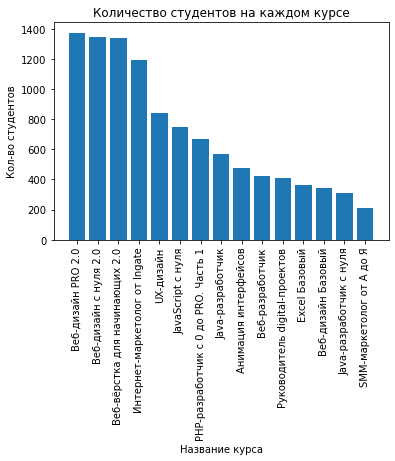

In [51]:
df_1 = df_age.groupby(['course_title', 'student_id']).count().reset_index()\
           .groupby('course_title')['student_id'].count().reset_index().sort_values('student_id')\
           .sort_values('student_id', ascending = False)
plt.bar(df_1['course_title'], df_1['student_id'])
plt.title('Количество студентов на каждом курсе')
plt.xlabel('Название курса') 
plt.ylabel('Кол-во студентов') 
plt.xticks(rotation = 90)

plt.show()

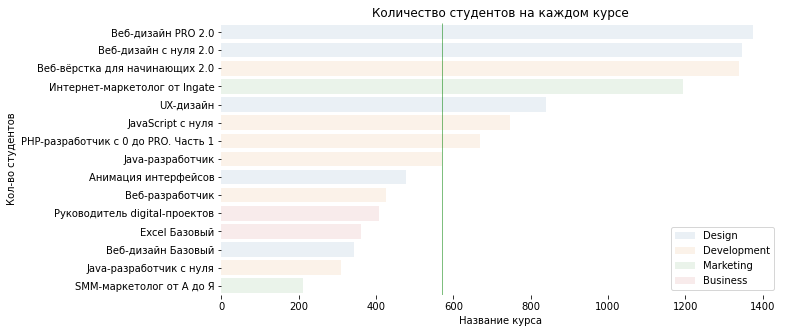

In [53]:
df_1 = df_age.groupby(['course_title', 'student_id']).count().reset_index()\
           .groupby('course_title')['student_id'].count().reset_index().sort_values('student_id')\
           .sort_values('student_id', ascending = False)
df_1 = df_1.merge(df_course)
df_1

fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(data = df_1, x = 'student_id', y = 'course_title',hue = 'course_field', ax = ax, alpha = 0.1, 
           orient = 'h', dodge=False)

ax.axvspan(xmin = df_1['student_id'].median(), xmax = df_1['student_id'].median(), color = 'green', alpha = 0.5)

ax.set_title('Количество студентов на каждом курсе')
ax.set_xlabel('Название курса') 
ax.set_ylabel('Кол-во студентов') 
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

## 2. Расчет потенциальной нагрузки на преподавателей

1. Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [34]:
df_1 = df.copy()
df_1 = df_1[df_1['is_homework']==True]
df_1 = df_1.drop(['progress_id', 'status', 'course_id', 'course_field', 'module_title', 'lesson_title',\
                 'lesson_token', 'is_video', 'is_homework'], axis = 1)

#таблица, которая для каждого курса и модуля дает номер урока, в котором находится первая работа на этом курсе
df_lesson = df_1.groupby(['course_title', 'module_number']).lesson_number.min().reset_index()

#таблица, которая для каждого курса дает номер модуля, в котором находится первая работа на этом курсе
df_1 = df_1.groupby('course_title').module_number.min().reset_index()

#объединяем два датафрейма, чтобы понимать, в каком модуле-уроке лежит первая дз
df_2 = df_1.merge(df_lesson, how = 'left', on = ['course_title', 'module_number']) 

#объединяем с итоговым датафреймом и сравниваем номера уроков и модулей
df_4 = df.merge(df_2, how = 'right', on = ['course_title'])
df_4['compare'] = (df_4['module_number_x']==df_4['module_number_y'])&\
                  (df_4['lesson_number_x']==df_4['lesson_number_y'])

#суммируем совпадения с первыми дз и получаем прирост студентов на курсе в каждом месяце
df_4['start_date'] = pd.to_datetime(df_4['start_date'])
#df_4['start_month_year'] = df_4['start_date'].dt.year.astype(str) + \
#                          '-'+ df_4['start_date'].dt.month.astype(str)

df_4['start_month_year'] = df_4['start_date'].dt.to_period('M')

df_4 = df_4.groupby(['course_title', 'start_month_year']).compare.sum().reset_index()

df_4.head()

course_title start_month_year  compare
0  Excel Базовый          2018-01        0
1  Excel Базовый          2018-02        6
2  Excel Базовый          2018-03        3
3  Excel Базовый          2018-04        0
4  Excel Базовый          2018-05        3

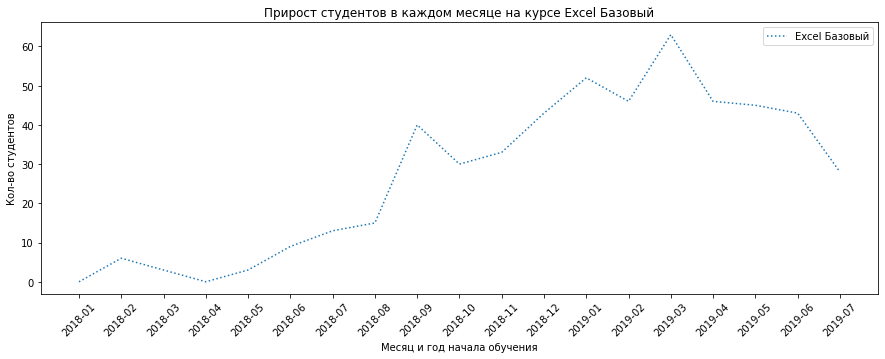

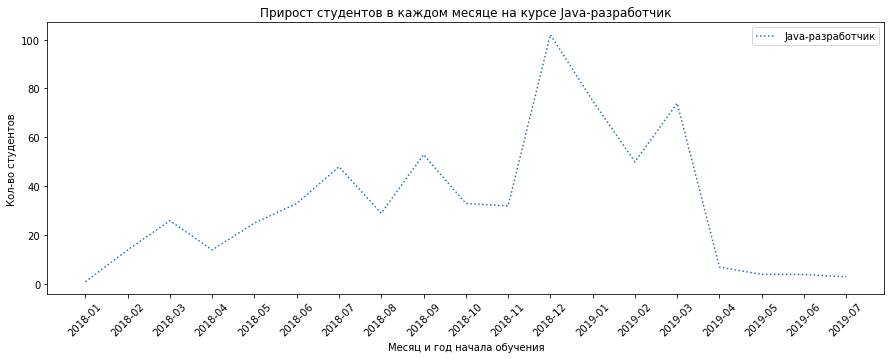

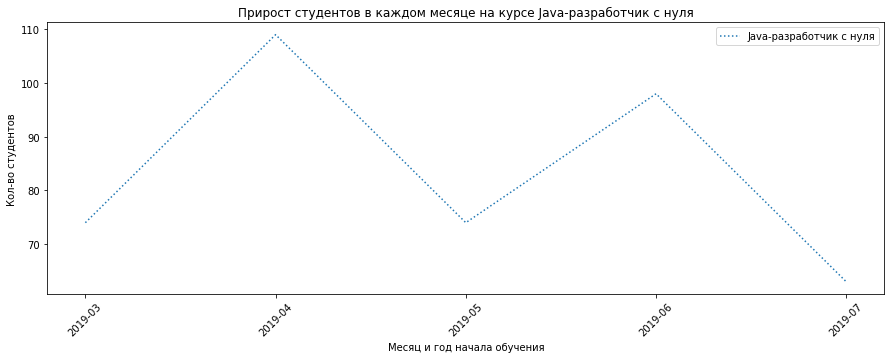

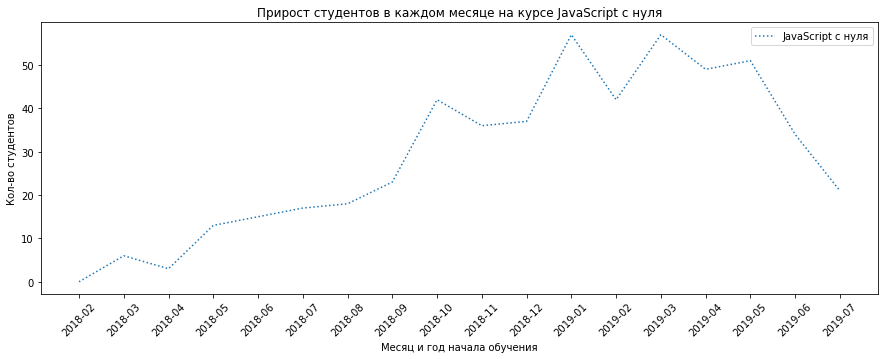

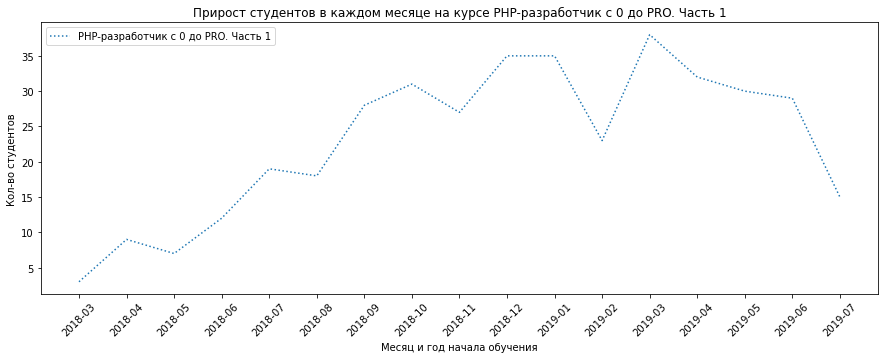

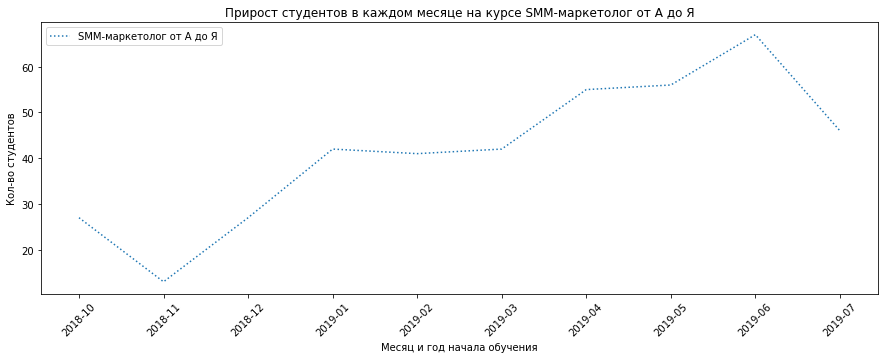

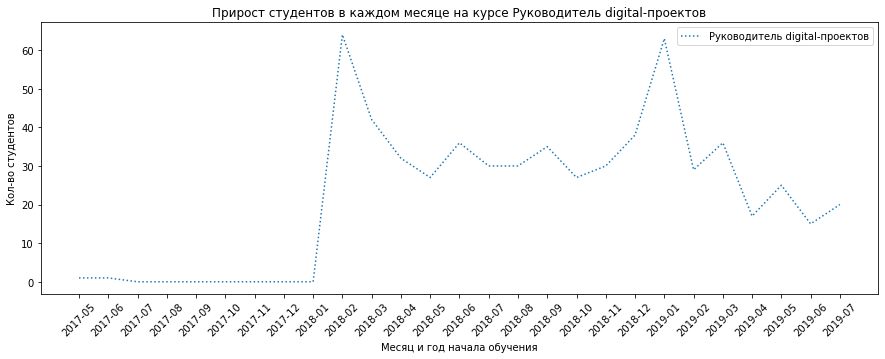

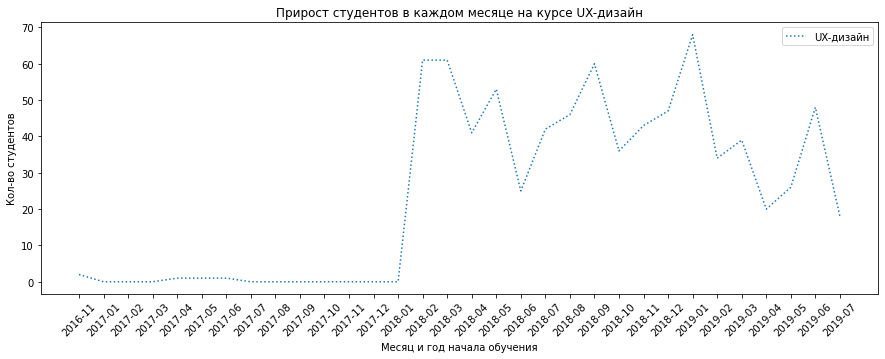

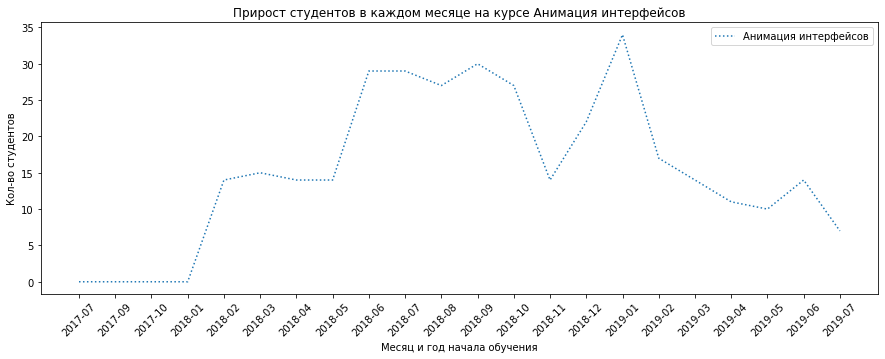

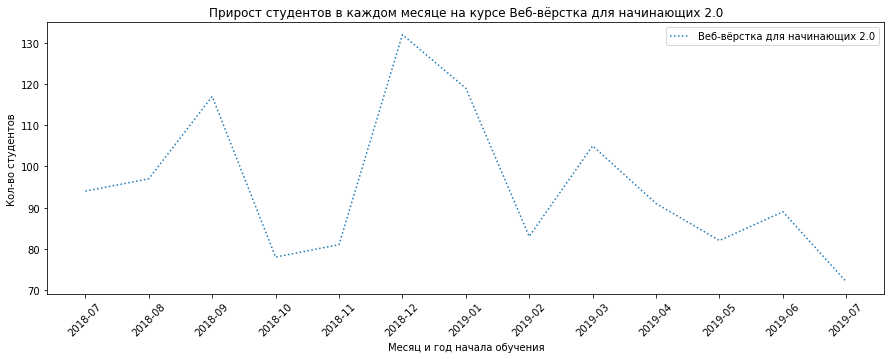

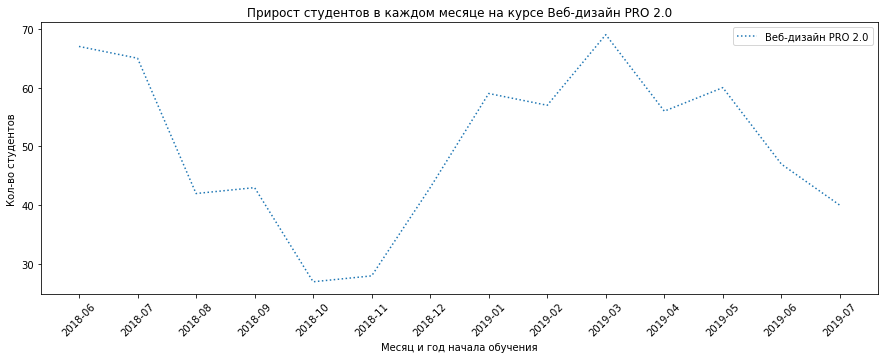

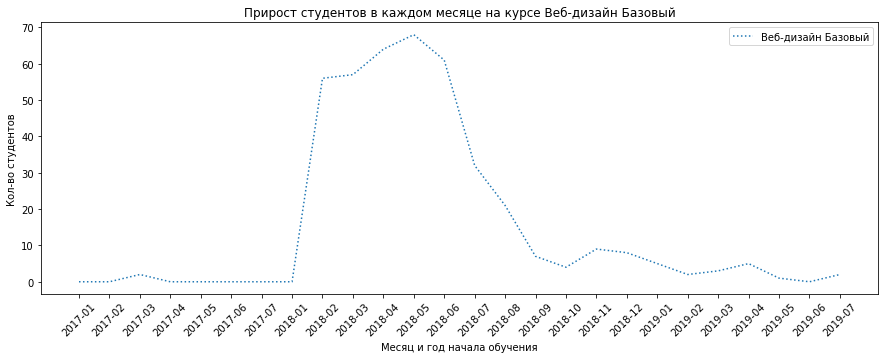

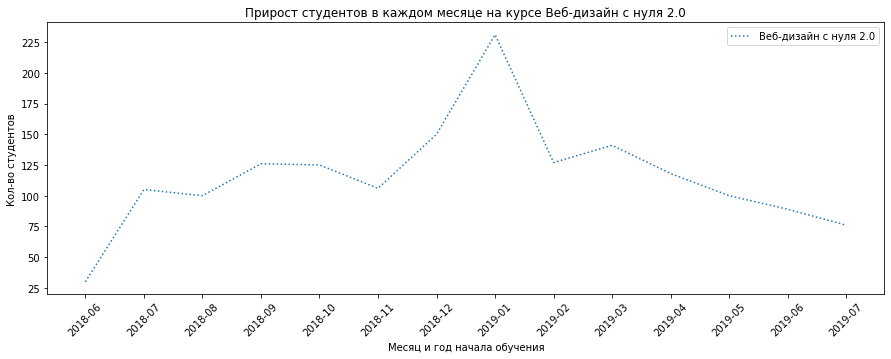

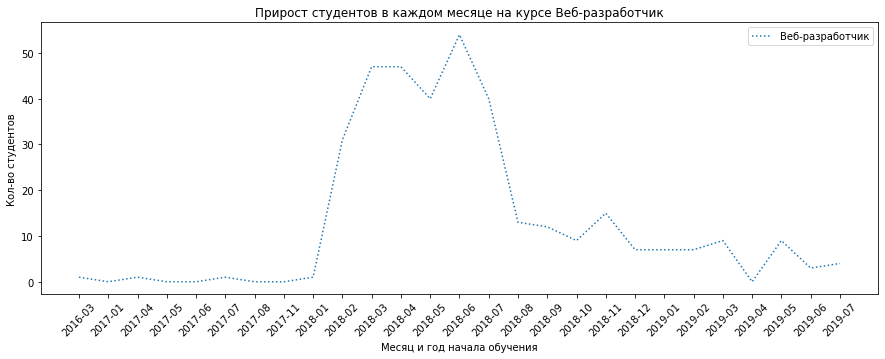

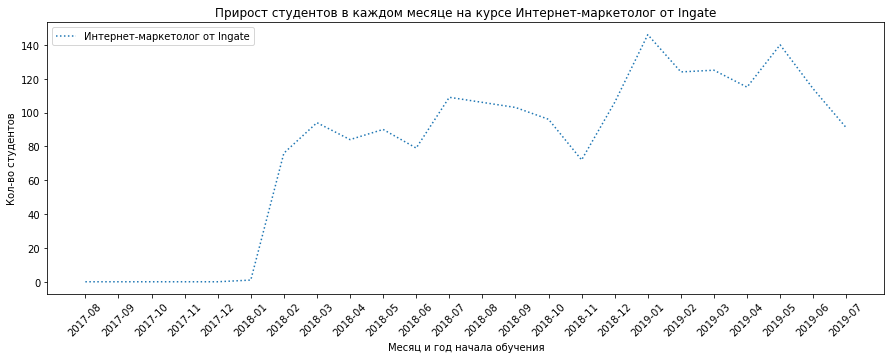

In [289]:
#визуализация
courses = list(['Excel Базовый', 'Java-разработчик', 'Java-разработчик c нуля','JavaScript с нуля',
                'PHP-разработчик с 0 до PRO. Часть 1','SMM-маркетолог от А до Я','Руководитель digital-проектов',
               'UX-дизайн','Анимация интерфейсов', 'Веб-вёрстка для начинающих 2.0', 'Веб-дизайн PRO 2.0',
               'Веб-дизайн Базовый', 'Веб-дизайн с нуля 2.0', 'Веб-разработчик','Интернет-маркетолог от Ingate'])

for i in courses:
    
    fig, ax = plt.subplots(figsize = (15, 5))
    ax.plot(df_4[df_4['course_title']== i].loc[:, 'start_month_year'].astype(str),\
            df_4[df_4['course_title']== i].loc[:, 'compare'], label = i, linestyle = ':')

    ax.set_title('Прирост студентов в каждом месяце на курсе'+ ' ' + i)
    ax.set_xlabel('Месяц и год начала обучения')
    ax.set_ylabel('Кол-во студентов')
    ax.tick_params(axis = 'x', rotation = 45)
    ax.legend()

    plt.show()

Excel Базовый - мы видим прирост студентов с момента начала наблюдения в январе 2018 года влоть до марта 2019, затем до конца наблюдений идет спад, аналогичная ситуация в курсе JavaScript с нуля, PHP-разработчик с 0 до PRO, за тем только исключением, что здесь небольшой спад был уже замечен в феврале 2019 года.

Похожая картина наблюдается в курсе Java-разработчик, но прирост есть до декабря 2018 года, причем с ноября по декабрь 2018 года наблюдается наибольший прирост за всю историю наблюдений. Интересно, что с апредя по июль 2019, после резкого снижения в марте, прирост практически отсутствует.

Java-разработчик c нуля - здесь мы видим два пика в апреле 2019 и июне 2019 года, между ними периоды спада. Можно предположить, что в это время была проведена какая-то компания по привлчечению студентов на этот курс.

SMM-маркетолог от А до Я - после запуска курса в октябре 2018 года прирост студентов снижается, но затем появляется спрос и мы видим рост вплоть до июня 2019 года.

Руководитель digital-проектов - этот курс не пользовался спросом до января 2018 года, когда случился резкий рост числа желающих его посетить, аналогичный прирост можно увидеть примерно через год - в январе 2019 года. Интересно было бы посмотреть наблюдения за 2020 и 2021 год, возможно эта тенденция имеет ежегодный характер (прирост студентов на этом курсе в начале года).

UX-дизайн - нет какой-то единой траектории прироста, разве что можно отметить, что резкий интерес к этому курсу появился в январе 2018 года.

Анимация интерфейсов - для этого курса можно отметить рост числа студентов с января по февраль 2018, затем с мая по июнь 2018 и с ноября по декабрь 2018 года, после чего начиется спад влоть до конца наблюдений.

Веб-вёрстка для начинающих - здесь тоже нет единой тенденции, но есть промежутки роста и падений числа студентов, я бы выделила три основных: с августа по сентябрь 2018 идет рост до 120 студентов, затем спад до октября; с ноября 2018 до декабря - резкий рост до 130 студентов, затем спад до февраля 2019 примерно до 80 студентов на курсе, затем рост примерно до 100 студентов в марте 2019 года и спад практически до минимума в 70 студентов в конце наблюдений.

Веб-дизайн PRO - с июня 2018 плоть до ноября 2018 видно падение интереса к этому курсу, затем спрос снова возобновляется до марта 2019, не исключено, что были проведены какие-то мероприятия для этого - реклама, акции и т.д.

Веб-дизайн Базовый - здесь очень примечательная картина, с января по май 2018 года резкий интерес к этому курсу, а затем такой же резкий спад до октября 2018 года, аналогичная ситуация с курсом Веб-разработчик.

Веб-дизайн с нуля - этот курс примечателен наибольшем приростом студентов в январе 2019 года - 225 человек, что хорошо видно на графике внизу.

Интернет-маркетолог от Ingate - здесь можно выделить с определенной периодичностью рост, затем выход на плато, а затем спад. Эти периоды длятся с января по октябрь 2018, затем с ноября по июль 2019 года.


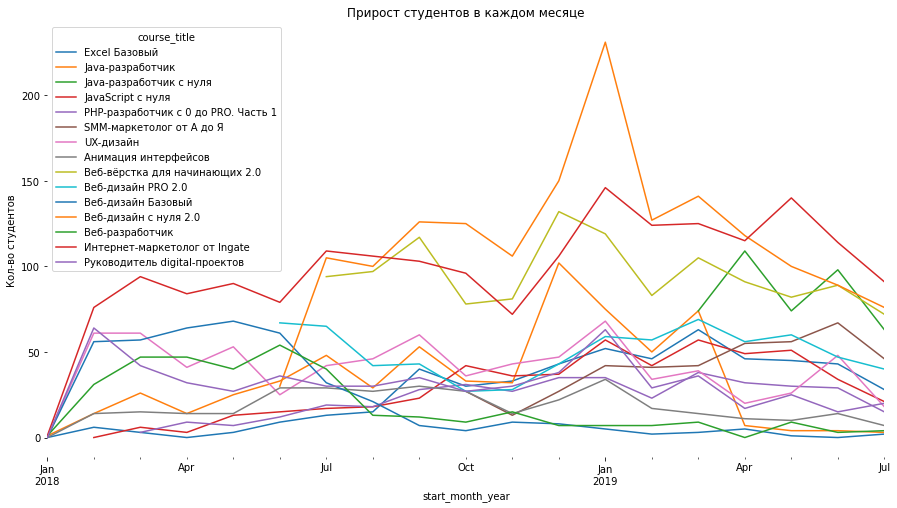

In [715]:
#визуализация прирост студентов в каждом месяце для каждого курса
fig, ax = plt.subplots(figsize=(15, 8))
pd.pivot_table(df_4, index = ['start_month_year'], columns = ['course_title'], values = 'compare')\
              .plot(ax = ax)

ax.set(title='Прирост студентов в каждом месяце', ylabel='Кол-во студентов', xlim=('2018-01-01','2019-07-31'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

(p) Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [35]:
#заполняем пропуски в столбце finish_date, будем считать, что в случае пропущенного значения, ДЗ не было выполнено
#до конца рассматриваемого периода

df_test = df.copy() 
df_test = df_test[df_test['is_homework']==True]
df_test['finish_date'] = df_test['finish_date'].fillna('2019-07')
df_test['start_date'] = pd.to_datetime(df_test['start_date'])
df_test['finish_date'] = pd.to_datetime(df_test['finish_date'], utc=True)

df_test['start_date'] = df_test['start_date'].dt.year.astype(str)+ \
                         '-'+ df_test['start_date'].dt.month_name().astype(str)

df_test['finish_date'] = df_test['finish_date'].dt.year.astype(str)+ \
                         '-'+ df_test['finish_date'].dt.month_name().astype(str)

df_test = df_test.drop(['progress_id','module_number', 'course_id', 'course_field', 'module_title', 'lesson_title',\
                 'lesson_token', 'is_video', 'is_homework', 'lesson_number'], axis = 1)

#посчитаем, сколько месяцев потребовалось для выполнения дз
f = lambda x: pd.date_range(start = x[0], end = x[1], freq = 'MS').astype(str)

df_test['delta'] = df_test.loc[:, ['start_date', 'finish_date']].apply(f, axis = 1)

#увеличим кол-во строк, в случае, если для выполнения понадобился больше, чем 1 месяц
df_test = df_test.explode('delta')

#преобразуем столбец delta в более читаемый вид
df_test['delta'] = pd.to_datetime(df_test['delta'])
df_test['delta'] = df_test['delta'].dt.to_period('M')

#подсчет кол-ва дз в каждом месяце 
df_test = df_test.groupby(['course_title', 'delta']).student_id.count().reset_index()

df_test.head()

course_title    delta  student_id
0  Excel Базовый  2018-02          37
1  Excel Базовый  2018-03           9
2  Excel Базовый  2018-04          16
3  Excel Базовый  2018-05          21
4  Excel Базовый  2018-06          41

In [36]:
#заполняем пропуски в столбце finish_date, будем считать, что в случае пропущенного значения, ДЗ было выполнено
#в тот же месяц, что и начато

df_test = df.copy() 
df_test = df_test[df_test['is_homework']==True]
df_test['finish_date'] = df_test['finish_date'].fillna(df_test['start_date'])
df_test['start_date'] = pd.to_datetime(df_test['start_date'])
df_test['finish_date'] = pd.to_datetime(df_test['finish_date'])

df_test['start_date'] = df_test['start_date'].dt.year.astype(str)+ \
                         '-'+ df_test['start_date'].dt.month_name().astype(str)

df_test['finish_date'] = df_test['finish_date'].dt.year.astype(str)+ \
                         '-'+ df_test['finish_date'].dt.month_name().astype(str)

df_test = df_test.drop(['progress_id','module_number', 'course_id', 'course_field', 'module_title', 'lesson_title',\
                 'lesson_token', 'is_video', 'is_homework', 'lesson_number'], axis = 1)

#посчитаем, сколько месяцев потребовалось для выполнения дз
f = lambda x: pd.date_range(start = x[0], end = x[1], freq = 'MS').astype(str)

df_test['delta'] = df_test.loc[:, ['start_date', 'finish_date']].apply(f, axis = 1)

#увеличим кол-во строк, в случае, если для выполнения понадобился больше, чем 1 месяц
df_test = df_test.explode('delta')

#преобразуем столбец delta в более читаемый вид
df_test['delta'] = pd.to_datetime(df_test['delta'])
df_test['delta'] = df_test['delta'].dt.to_period('M')

#подсчет кол-ва дз в каждом месяце 
df_test = df_test.groupby(['course_title', 'delta']).student_id.count().reset_index()
df_test.head()

course_title    delta  student_id
0  Excel Базовый  2018-02          37
1  Excel Базовый  2018-03           7
2  Excel Базовый  2018-04          13
3  Excel Базовый  2018-05          17
4  Excel Базовый  2018-06          37

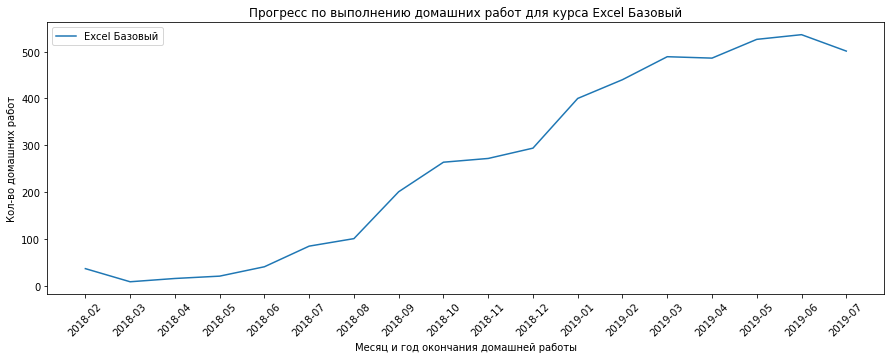

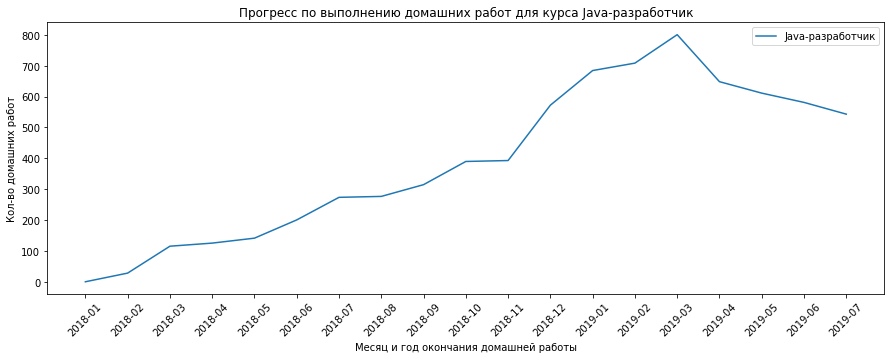

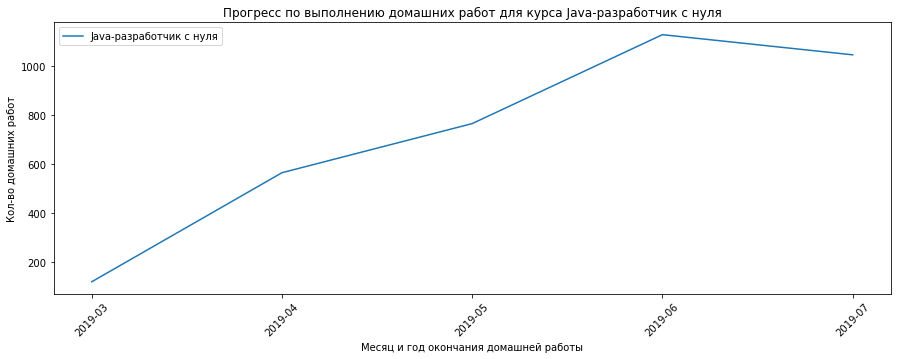

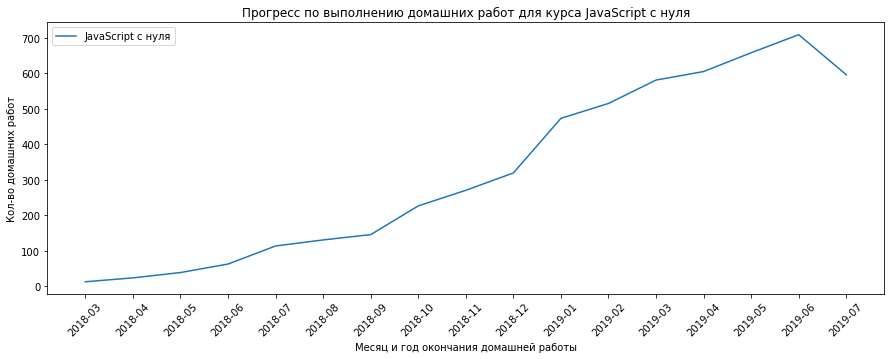

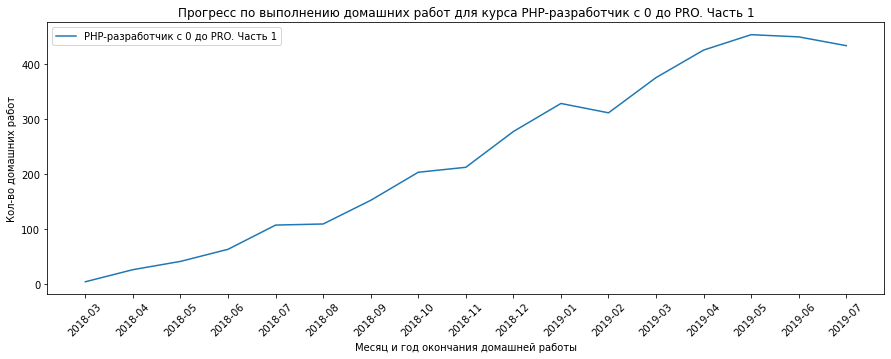

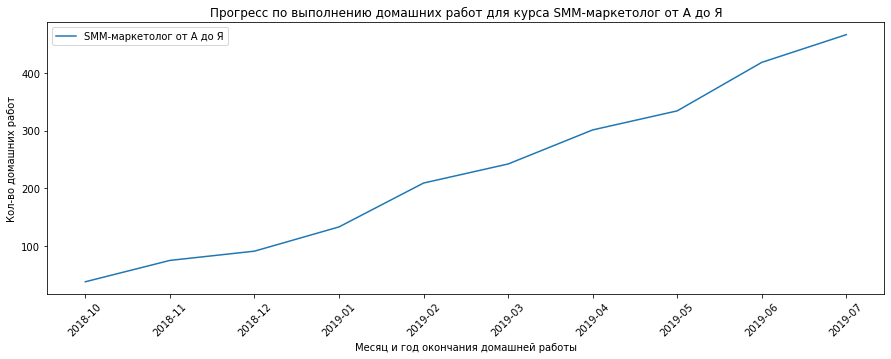

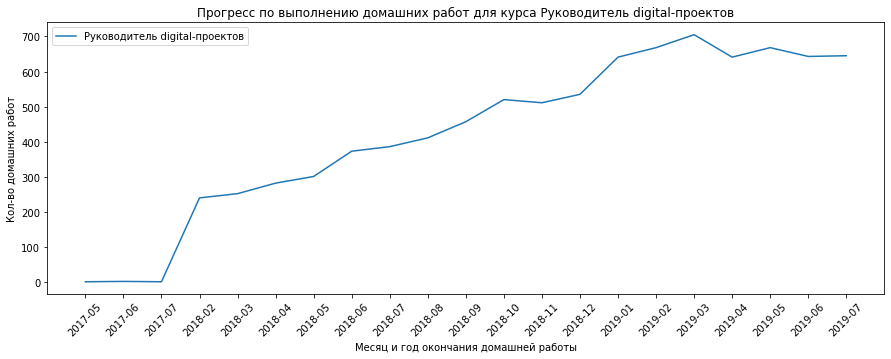

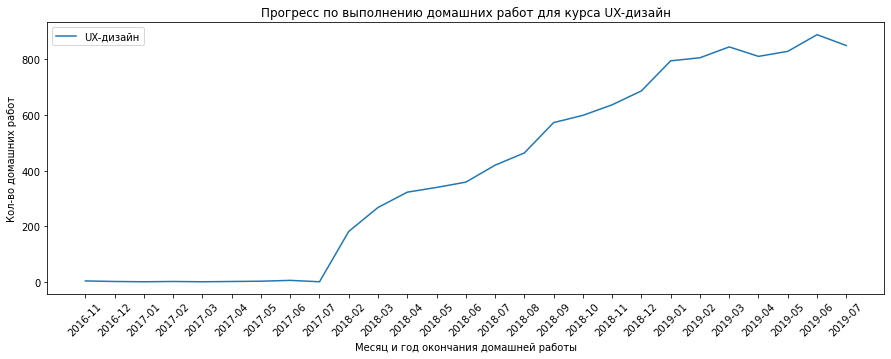

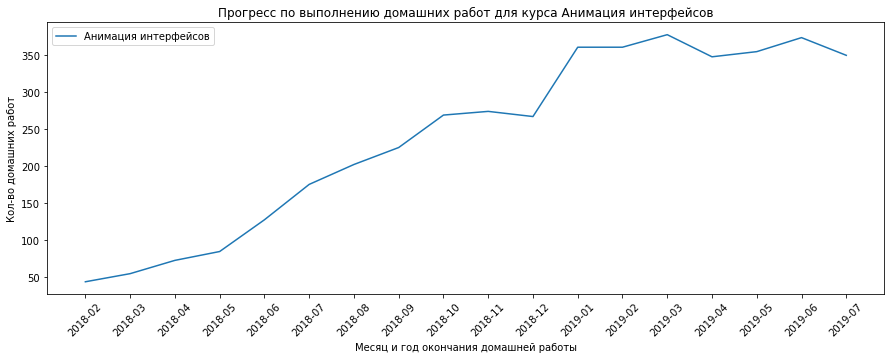

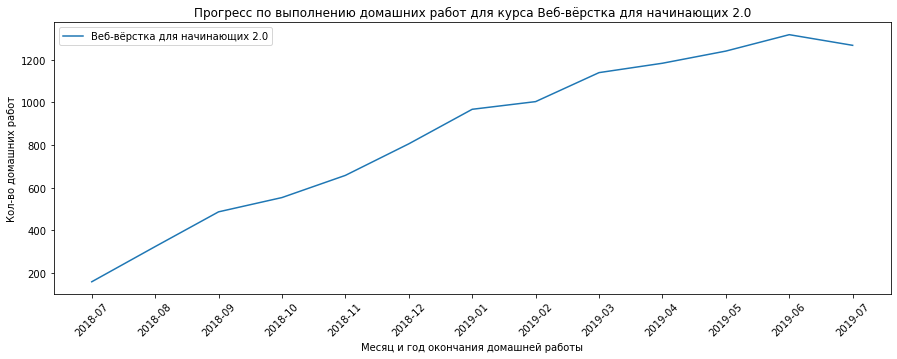

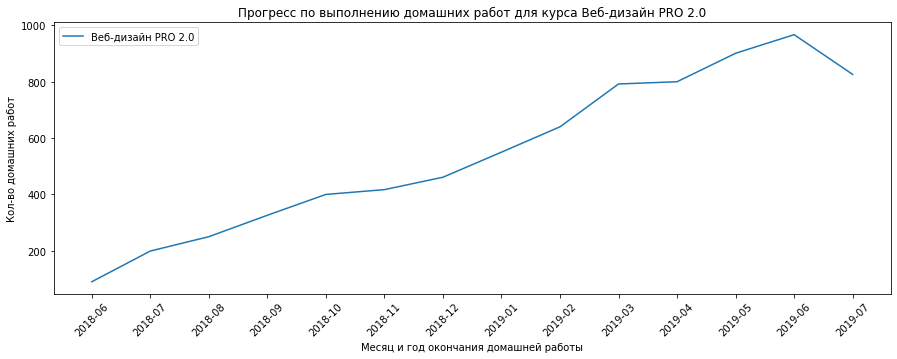

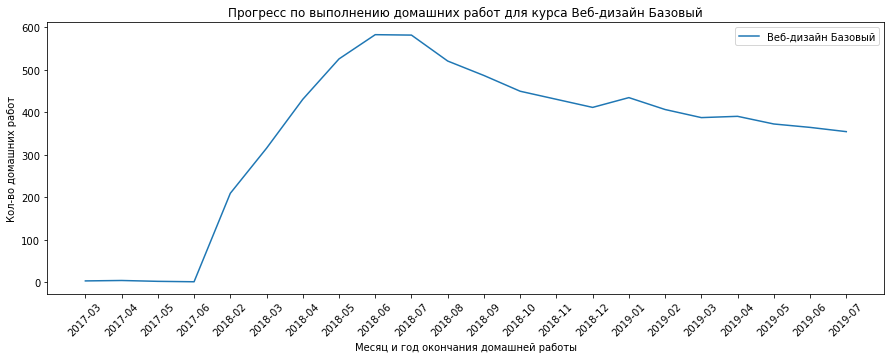

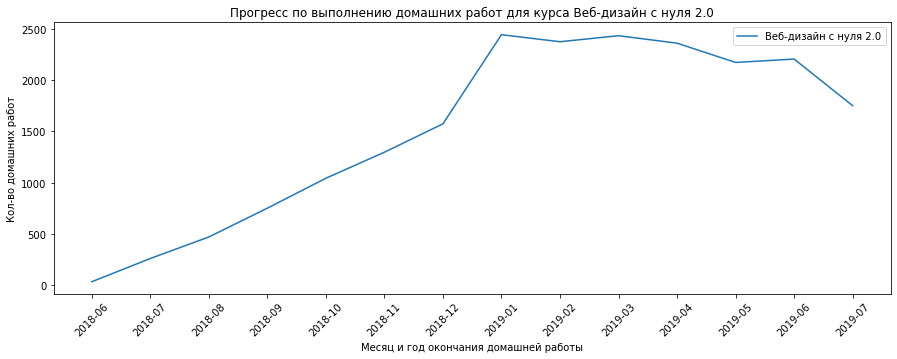

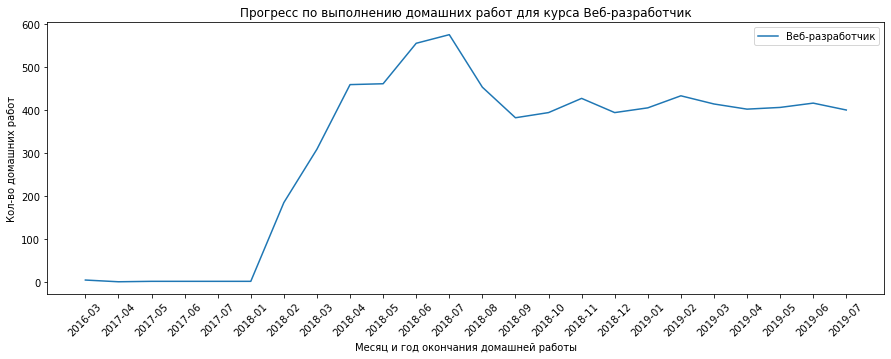

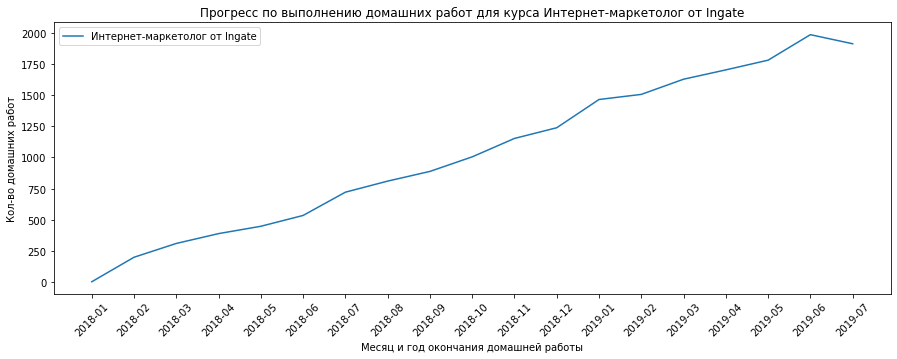

In [371]:
#графики построены, с учетом данных, что дз не было выполнено вплоть до конца наблюдений
for i in courses:
    fig, ax = plt.subplots(figsize = (15, 5))
    ax.plot(df_test.loc[df_test.course_title == i, :].delta.astype(str), \
            df_test.loc[df_test.course_title == i, :].student_id,\
            label = i)

    ax.set_title('Прогресс по выполнению домашних работ для курса'+ ' ' + i)
    ax.set_xlabel('Месяц и год окончания домашней работы')
    ax.set_ylabel('Кол-во домашних работ')
    ax.tick_params(axis = 'x', rotation = 45)
    ax.legend()

    plt.show()

Практически по всем курсам наблюдается рост прогрессов по выполнению домашних работ с течением времени, за исключением курсов:

Веб-дизайн Базовый - здесь пик приходится на июнь-июль 2018 года, затем идет линейно спад

Веб-дизайн с нуля - рост продолжается вплоть до января 2019 года, затем прогресс выходит на плато и начитнается спад.

Веб-разработчик - рост до июня - июля 2018 года, затем спад до сентября 2018 года, затем число прогрессов практически не меняется до конца наблюдений.

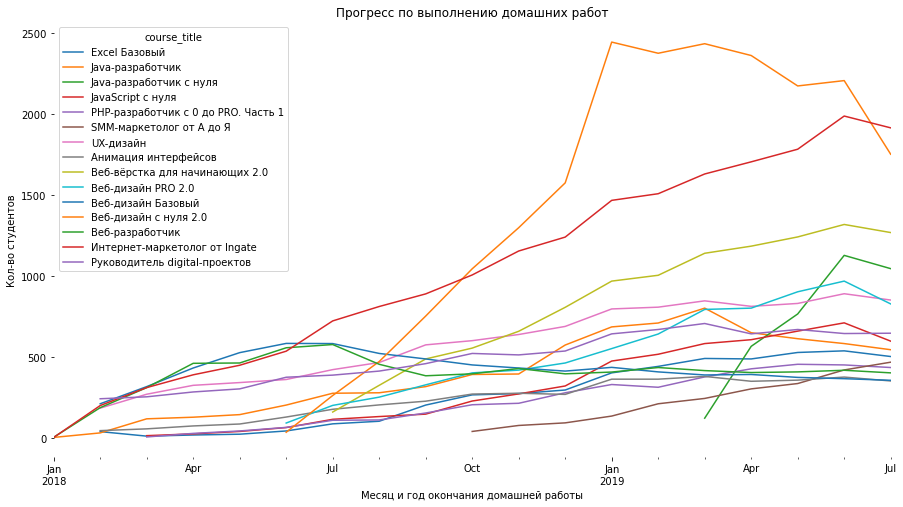

In [722]:
fig, ax = plt.subplots(figsize=(15, 8))
pd.pivot_table(df_test, index = ['delta'], columns = ['course_title'], values = 'student_id')\
              .plot(ax = ax)

ax.set(title='Прогресс по выполнению домашних работ', \
       ylabel='Кол-во студентов', \
       xlabel = 'Месяц и год окончания домашней работы',\
       xlim=('2018-01-01','2019-07-31'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

2. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 

In [38]:
df_time = df.copy()
df_time = df[df['is_homework']==True]
df_time['finish_date'] = df_time['finish_date'].fillna('2019-07-31')

#дата начала прохождения каждого модуля для каждого студента
df_time_1 = df_time.groupby(['course_title','module_number','module_title', 'student_id']).start_date.min().reset_index()

#дата окончания прохождения каждого модуля для каждого студента
df_time_2 = df_time.groupby(['course_title','module_number','module_title', 'student_id']).finish_date.max().reset_index()

#объединяем два датасета, чтобы посчитать разницу между временем начала и временем окончания модуля
df_time = df_time_1.merge(df_time_2, how = 'right', on = ['course_title','module_number', 'module_title','student_id'])

df_time['start_date'] = pd.to_datetime(df_time['start_date'])
df_time['finish_date'] = pd.to_datetime(df_time['finish_date'], utc=True)

#убираем некорректные данные, где дата начала позже даты окончания, чтобы не получать отрицательные результаты
df_time = df_time.drop(df_time[df_time.finish_date <= df_time.start_date].index) 

#вычисляем разность
df_time['delta'] = (df_time['finish_date'] - df_time['start_date'])

df_time.head()

course_title  module_number               module_title  \
0  Excel Базовый              1  Основной функционал Excel   
1  Excel Базовый              1  Основной функционал Excel   
2  Excel Базовый              1  Основной функционал Excel   
3  Excel Базовый              1  Основной функционал Excel   
4  Excel Базовый              1  Основной функционал Excel   

                         student_id                       start_date  \
0  001b192f899a84496be98b41906246fc 2019-03-29 20:43:08.914029+00:00   
1  006f0189ec657741ee4d53474c7a258d 2019-01-25 03:25:26.690241+00:00   
2  0074621b6955733338ab0feb2a9a2100 2019-04-10 14:09:35.364174+00:00   
3  0098ca12f73a56dadbf6099389305d80 2019-04-03 11:06:03.164368+00:00   
4  0203a4ab8610441e866932fb899ed583 2019-05-08 16:24:20.710680+00:00   

                       finish_date                   delta  
0 2019-03-31 07:19:02.064532+00:00  1 days 10:35:53.150503  
1 2019-01-26 09:52:36.422160+00:00  1 days 06:27:09.731919  
2 2019-04-13 05:57:59.476184+00:00  2 days 15:48:24.112010  
3 2019-04-05 09:37:10.695661+00:00  1 days 22:31:07.531293  
4        2019-07-31 00:00:00+00:00 83 days 07:35:39.289320

In [39]:
#минимальное время прохождения каждого модуля
df_time.groupby(['course_title','module_number','module_title'])['delta'].min().reset_index().head()

course_title  module_number  \
0  Excel Базовый              1   
1  Excel Базовый              2   
2  Excel Базовый              3   
3  Excel Базовый              4   
4  Excel Базовый              5   

                                        module_title                  delta  
0                          Основной функционал Excel 0 days 00:52:49.101080  
1            Основной функционал Excel (продолжение) 0 days 00:53:46.720239  
2                  Формулы и функции Excel. Введение 0 days 00:28:21.958252  
3  Формулы и функции Excel. Продолжаем работать с... 0 days 01:45:43.006464  
4     Формулы и функции Excel. Более сложные формулы 0 days 01:22:41.490445

In [40]:
#максимальное время прохождения каждого модуля
df_time.groupby(['course_title','module_number','module_title'])['delta'].max().reset_index().head()

course_title  module_number  \
0  Excel Базовый              1   
1  Excel Базовый              2   
2  Excel Базовый              3   
3  Excel Базовый              4   
4  Excel Базовый              5   

                                        module_title                    delta  
0                          Основной функционал Excel 501 days 14:38:18.136668  
1            Основной функционал Excel (продолжение) 357 days 11:53:01.102200  
2                  Формулы и функции Excel. Введение 364 days 10:56:14.077407  
3  Формулы и функции Excel. Продолжаем работать с... 350 days 12:25:01.774465  
4     Формулы и функции Excel. Более сложные формулы 318 days 07:18:49.227432

Чтобы посчитать остальные метрики, нужно немного преобразовать данные, так как посчитать среднее и медианное значение для формата timedelta нельзя, я предлагаю рассматривать данные в формате дней.

In [41]:
f = lambda x: x.total_seconds()/86400
df_time['delta_days'] = df_time['delta'].apply(f)
df_time.head()

course_title  module_number               module_title  \
0  Excel Базовый              1  Основной функционал Excel   
1  Excel Базовый              1  Основной функционал Excel   
2  Excel Базовый              1  Основной функционал Excel   
3  Excel Базовый              1  Основной функционал Excel   
4  Excel Базовый              1  Основной функционал Excel   

                         student_id                       start_date  \
0  001b192f899a84496be98b41906246fc 2019-03-29 20:43:08.914029+00:00   
1  006f0189ec657741ee4d53474c7a258d 2019-01-25 03:25:26.690241+00:00   
2  0074621b6955733338ab0feb2a9a2100 2019-04-10 14:09:35.364174+00:00   
3  0098ca12f73a56dadbf6099389305d80 2019-04-03 11:06:03.164368+00:00   
4  0203a4ab8610441e866932fb899ed583 2019-05-08 16:24:20.710680+00:00   

                       finish_date                   delta  delta_days  
0 2019-03-31 07:19:02.064532+00:00  1 days 10:35:53.150503    1.441587  
1 2019-01-26 09:52:36.422160+00:00  1 days 06:27:09.731919    1.268863  
2 2019-04-13 05:57:59.476184+00:00  2 days 15:48:24.112010    2.658612  
3 2019-04-05 09:37:10.695661+00:00  1 days 22:31:07.531293    1.938282  
4        2019-07-31 00:00:00+00:00 83 days 07:35:39.289320   83.316427

In [42]:
#медианное время прохождения каждого модуля
df_time_median = df_time.groupby(['course_title','module_number','module_title'])\
                        ['delta_days'].median().reset_index()

df_time_median['module_number'] = df_time_median['module_number'].astype(str) +\
                                    ' '+ df_time_median['module_title'] 
df_time_median.head()

course_title                                      module_number  \
0  Excel Базовый                        1 Основной функционал Excel   
1  Excel Базовый          2 Основной функционал Excel (продолжение)   
2  Excel Базовый                3 Формулы и функции Excel. Введение   
3  Excel Базовый  4 Формулы и функции Excel. Продолжаем работать...   
4  Excel Базовый   5 Формулы и функции Excel. Более сложные формулы   

                                        module_title  delta_days  
0                          Основной функционал Excel    2.698935  
1            Основной функционал Excel (продолжение)    2.033030  
2                  Формулы и функции Excel. Введение    1.551719  
3  Формулы и функции Excel. Продолжаем работать с...    4.183571  
4     Формулы и функции Excel. Более сложные формулы    3.659752

In [43]:
#среднее время прохождения каждого модуля
df_time.groupby(['course_title','module_number','module_title'])['delta_days'].mean().reset_index().head()

course_title  module_number  \
0  Excel Базовый              1   
1  Excel Базовый              2   
2  Excel Базовый              3   
3  Excel Базовый              4   
4  Excel Базовый              5   

                                        module_title  delta_days  
0                          Основной функционал Excel   17.266631  
1            Основной функционал Excel (продолжение)   11.798844  
2                  Формулы и функции Excel. Введение    7.681984  
3  Формулы и функции Excel. Продолжаем работать с...   24.616170  
4     Формулы и функции Excel. Более сложные формулы   15.826923

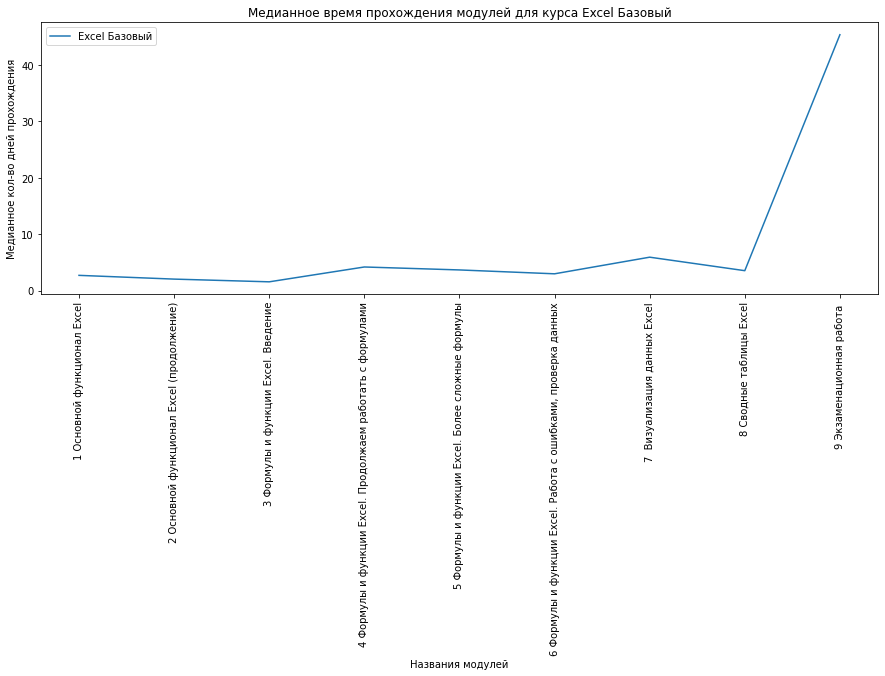

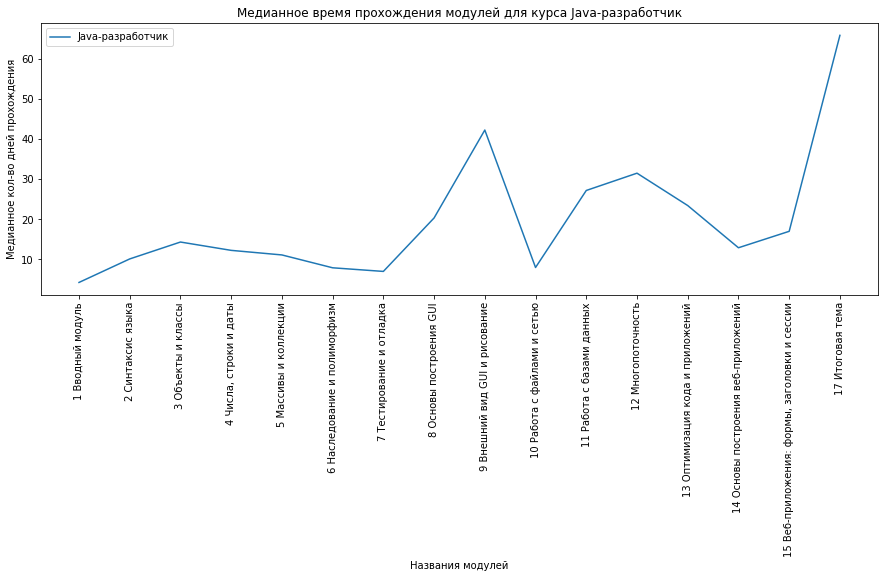

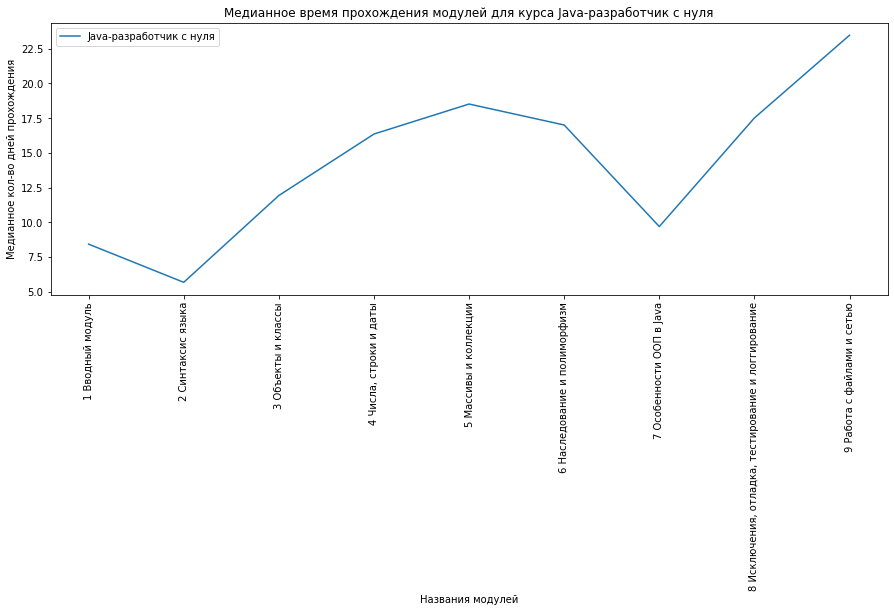

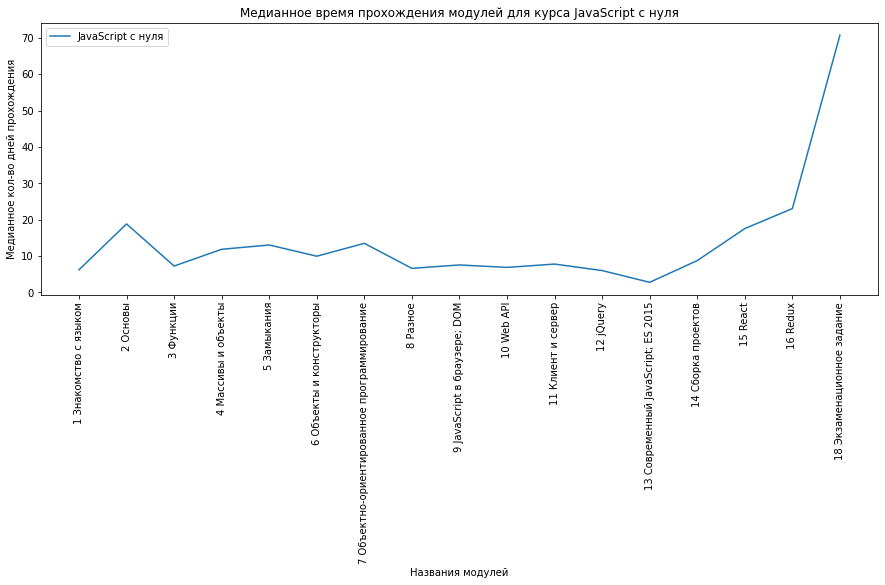

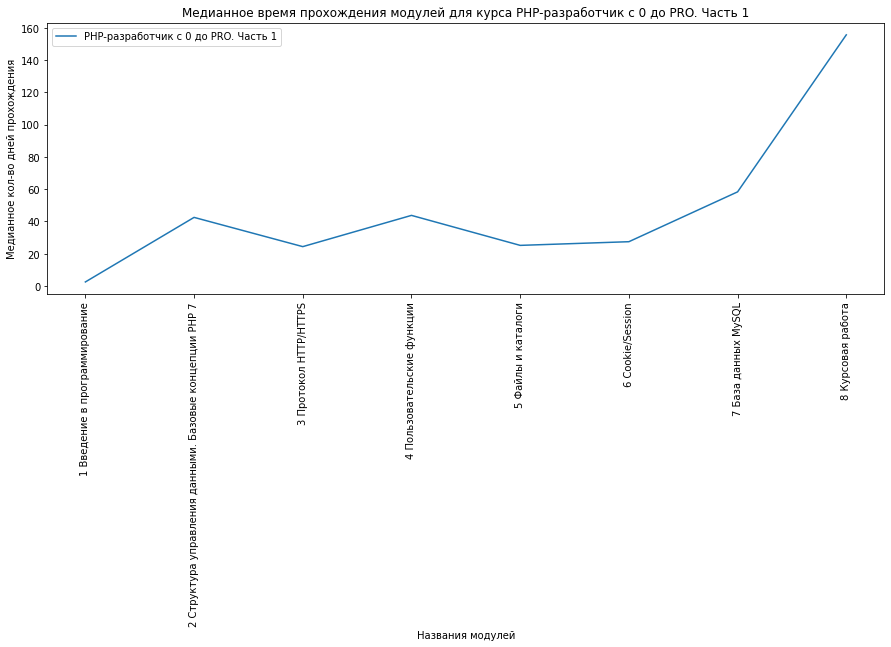

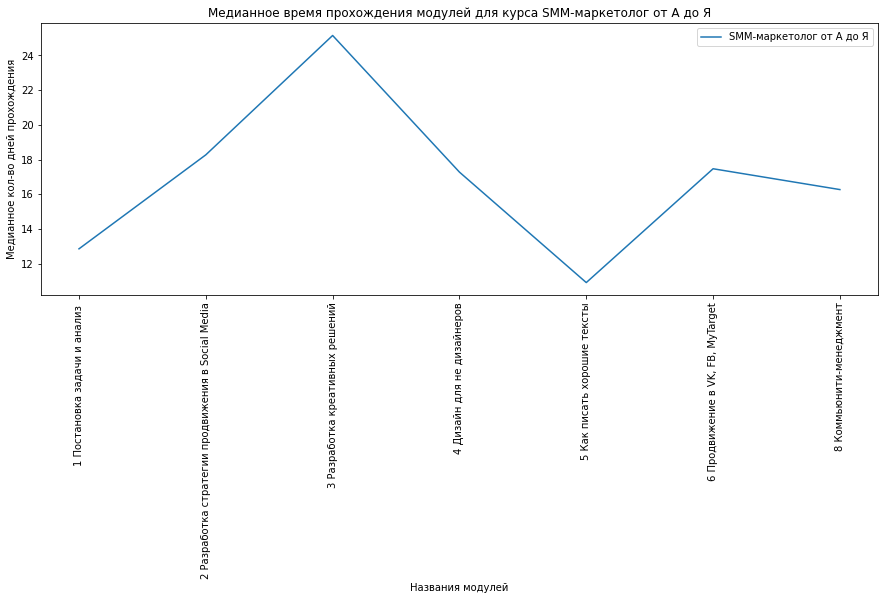

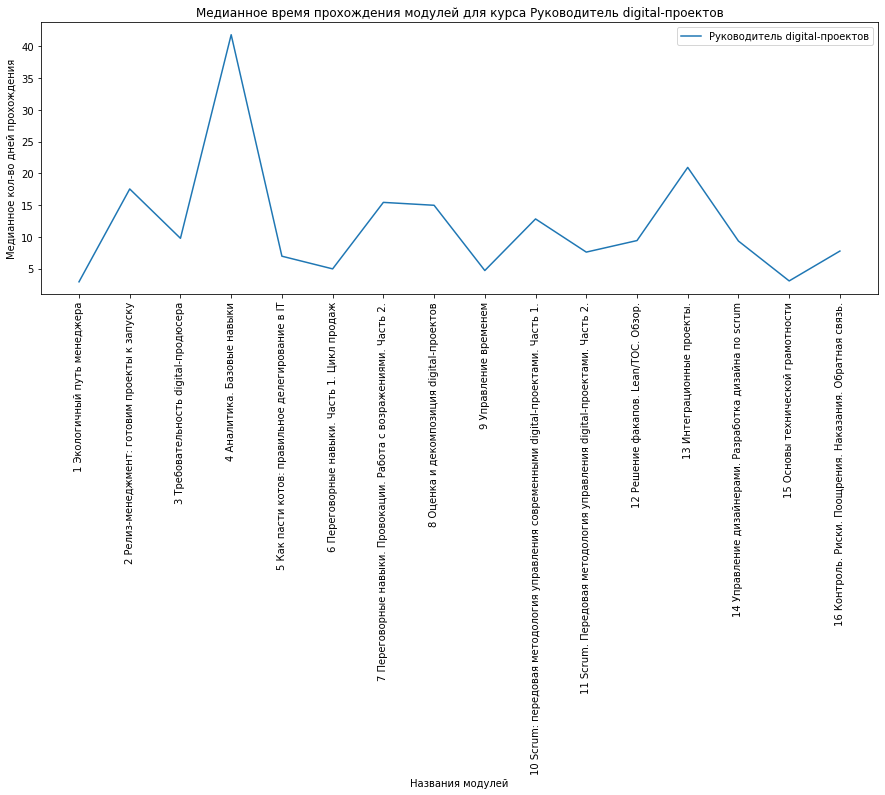

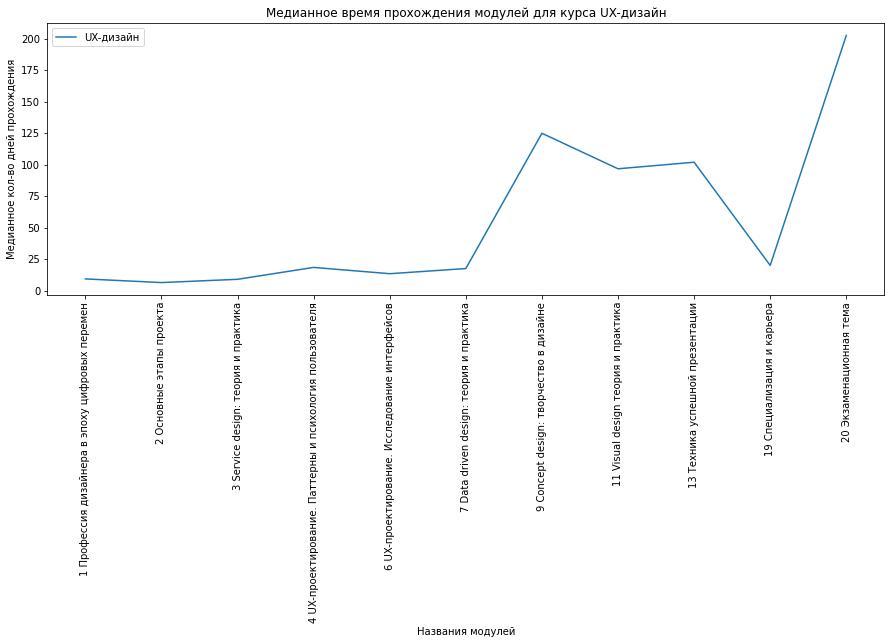

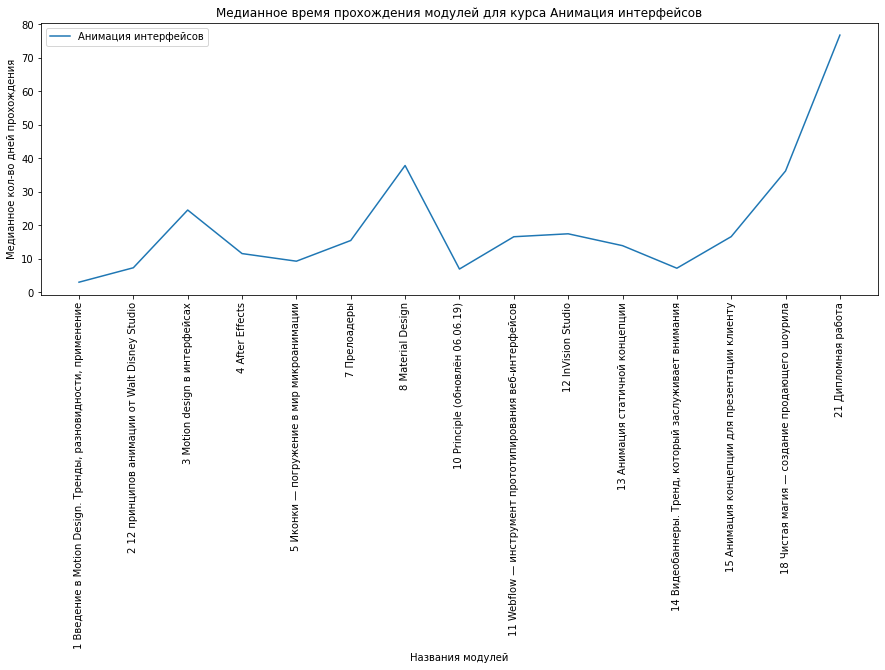

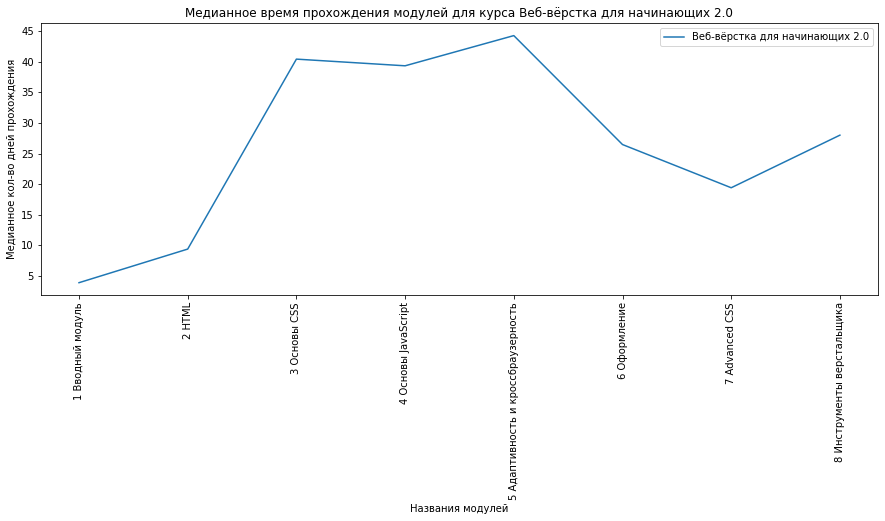

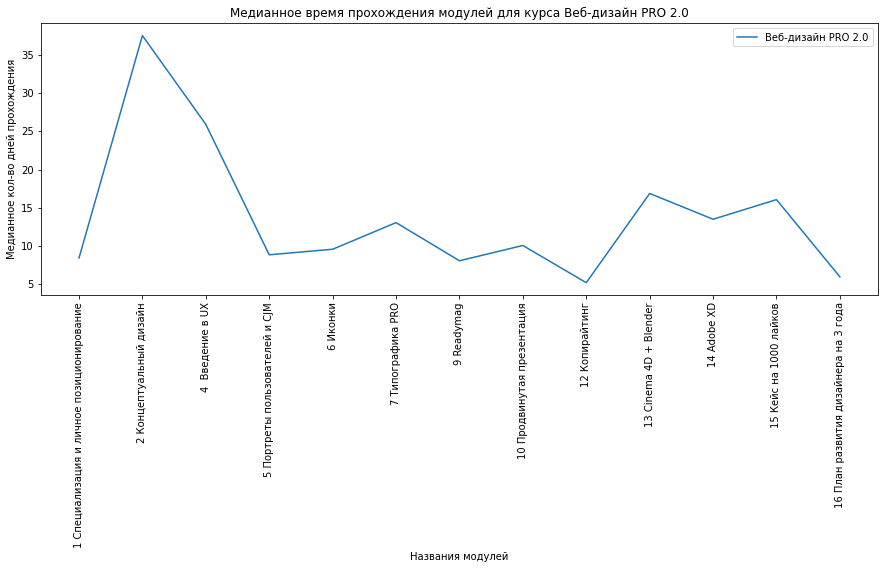

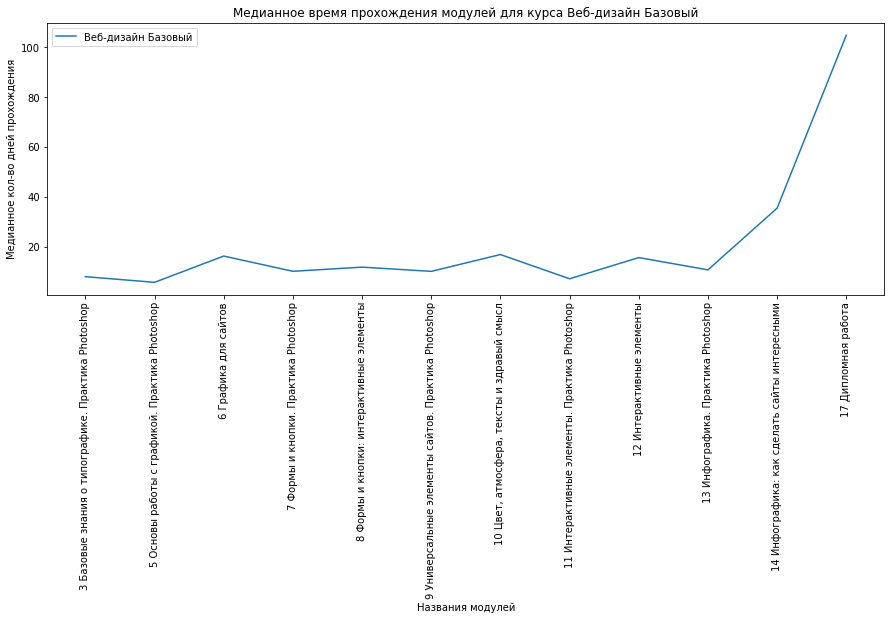

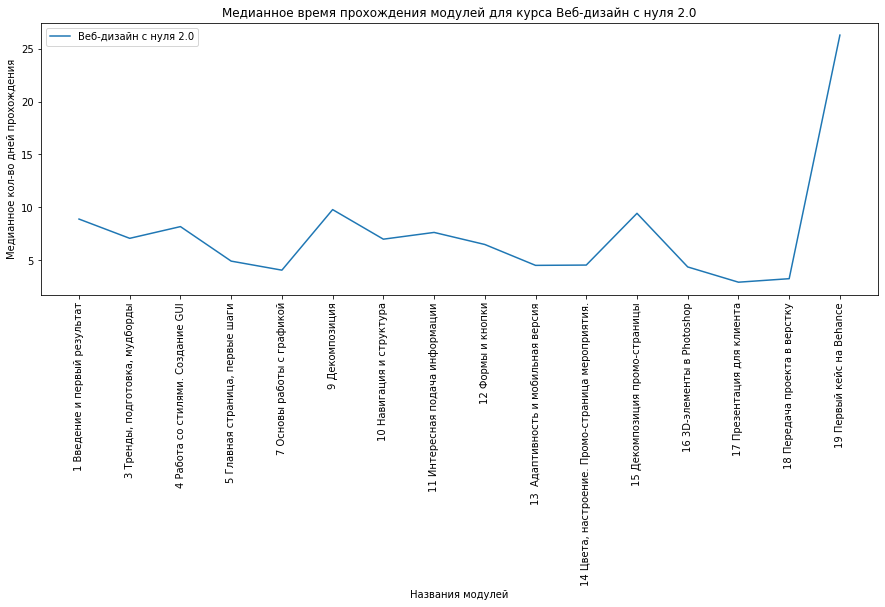

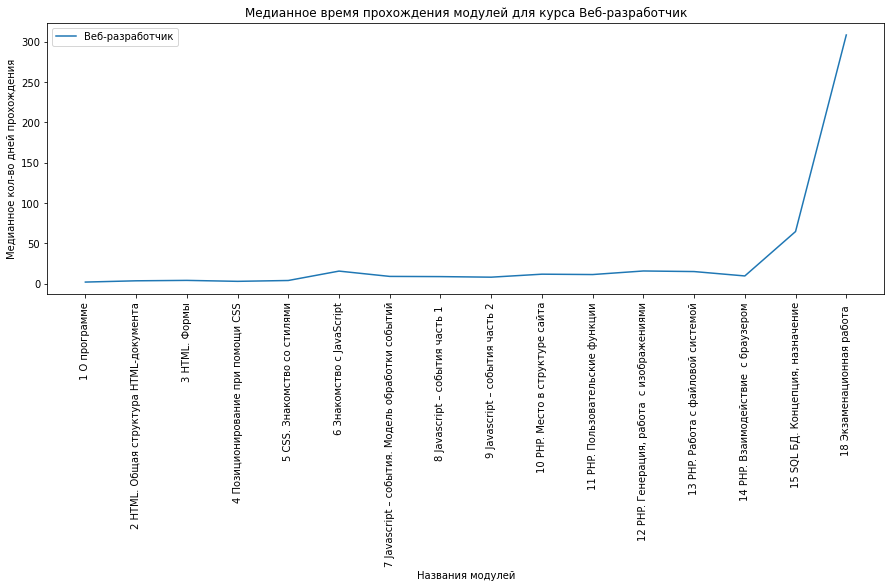

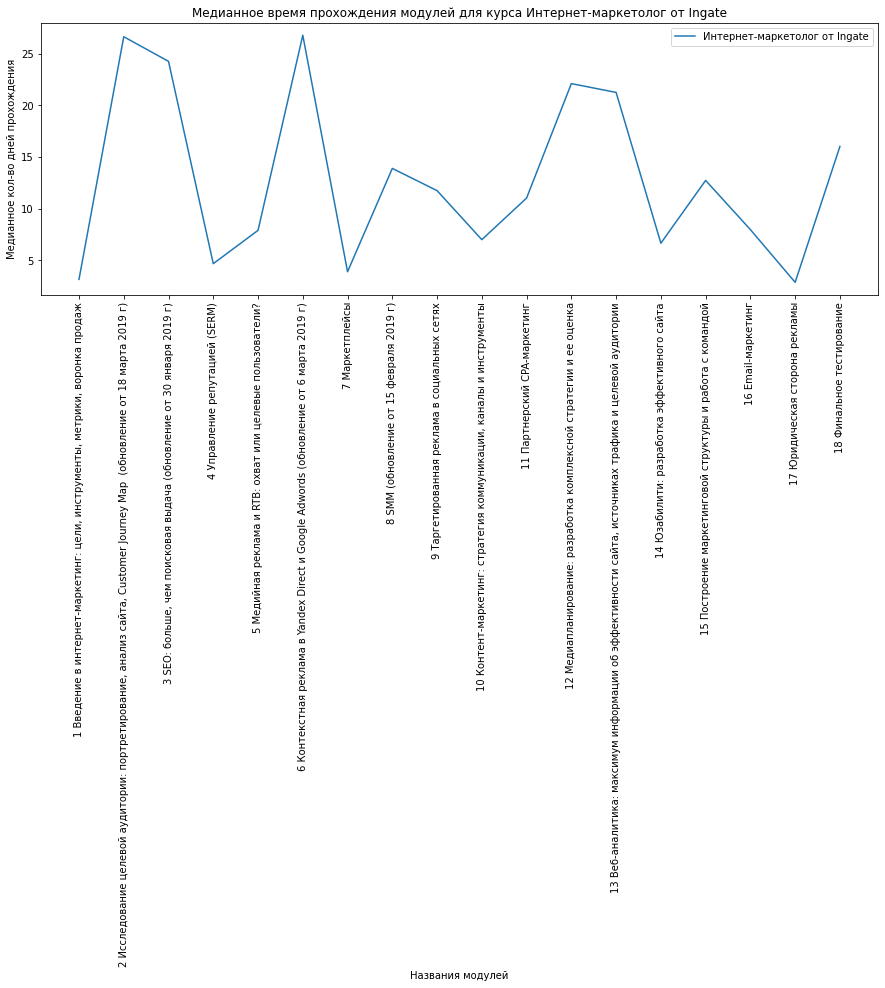

In [771]:
#визуализация
for i in courses:

    fig, ax = plt.subplots(figsize = (15,5))
    ax.plot(df_time_median.loc[df_time_median.course_title == i, :].module_number, \
            df_time_median.loc[df_time_median.course_title == i, :].delta_days,\
            label = i)

    ax.set_title('Медианное время прохождения модулей для курса'+ ' ' + i)
    ax.set_xlabel('Названия модулей')
    ax.set_ylabel('Медианное кол-во дней прохождения')
    ax.tick_params(axis = 'x', rotation = 90)
    ax.legend()

    plt.show()

В целом можно заметить тенденцию, когда последний модуль требует больше времени для выполнения, чем остальные модули курса, за исключением курсов:

SMM-маркетолог от А до Я, где выделяется модуль разработка креативных решений.

Руководитель digital-проектов - модуль аналитика базовые навыки, на прохождение которого приходится 40 дней, что почти вдвое больше, чем остальные модули курса.

UX-дизайн - тут выделяются сразу три модуля помимо экзаменационного задания: concept design, visual design и техника успешной презентации (медианнное время - 100 дней каждый).

Анимация интерфейсов - помимо дипломной работы выделяются модули Motion Design и Material Design.

Веб-вёрстка -  проблемными с точки зрения времени прохождения являются модули - основы CSS, основы JavaScript, адаптивность и кроссбраузерность (от 40 до 45 дней прохождения).

Веб-дизайн PRO - концептуальный дизайн, который стоит вторым по счету и занимает примерно 35 дней прохождения.

Интернет-маркетолог от Ingate -  можно выделить сразу 5 модулей из 15, которые выделяются своим временем прохождения: 2, 3, 5, 12 и 13 (названия модулей достаточно длинные, поэтому здесь я только перечисляю номера).

(p) Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса.

In [44]:
df_season = df.copy() 
df_season = df_season[df_season['is_homework']==True]
df_season['finish_date'] = df_season['finish_date'].fillna('2019-07-31')
df_season['start_date'] = pd.to_datetime(df_season['start_date'])
df_season['finish_date'] = pd.to_datetime(df_season['finish_date'], utc=True)

#убираем некорректные данные, где дата начала позже даты окончания, чтобы не получать отрицательные результаты
df_season = df_season.drop(df_season[df_season.finish_date <= df_season.start_date].index) 

#вычисляем разность
df_season['delta'] = (df_season['finish_date'] - df_season['start_date'])

#так как посчитать среднее и медианное значение для формата timedelta нельзя, 
#я предлагаю рассматривать данные в формате дней

f = lambda x: x.total_seconds()/86400
df_season['delta_days'] = df_season['delta'].apply(f)

df_season['finish_months'] = df_season['finish_date'].dt.month

df_season = df_season.groupby(['course_title','finish_months'])['delta_days'].median().reset_index()
df_season.head()

course_title  finish_months  delta_days
0  Excel Базовый              1    2.099530
1  Excel Базовый              2    2.440210
2  Excel Базовый              3    2.828454
3  Excel Базовый              4    1.883787
4  Excel Базовый              5    2.580251

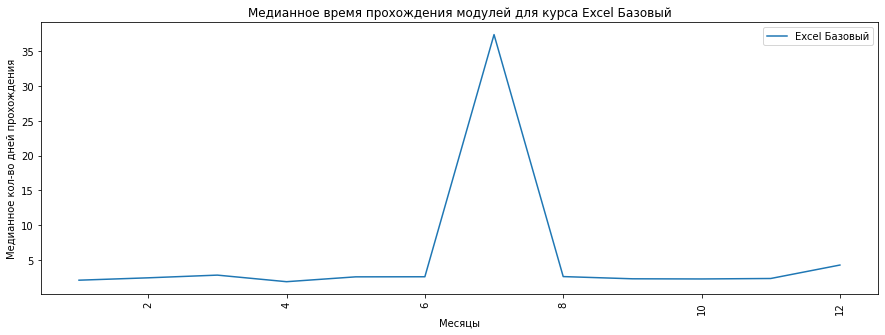

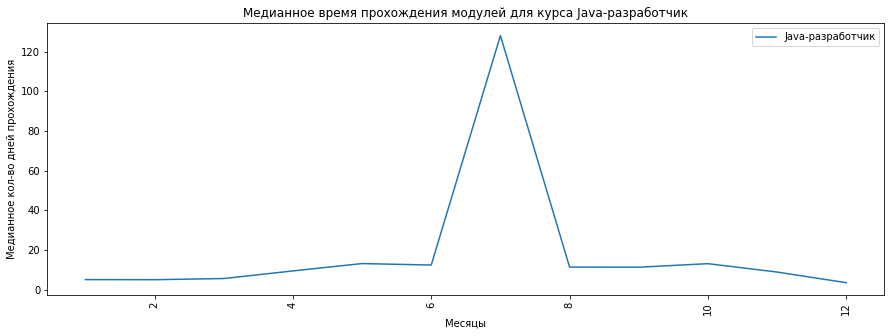

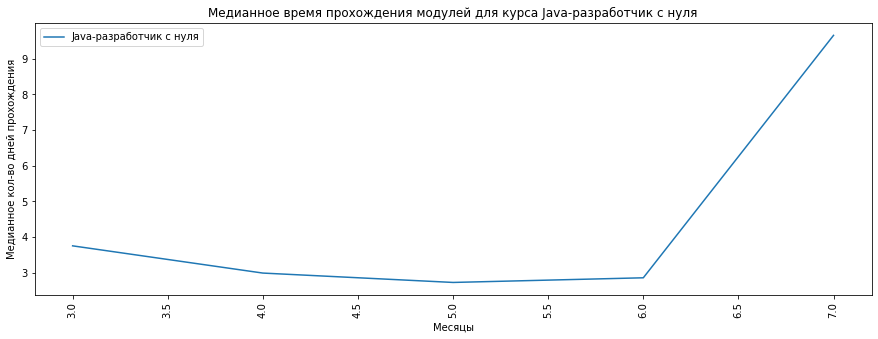

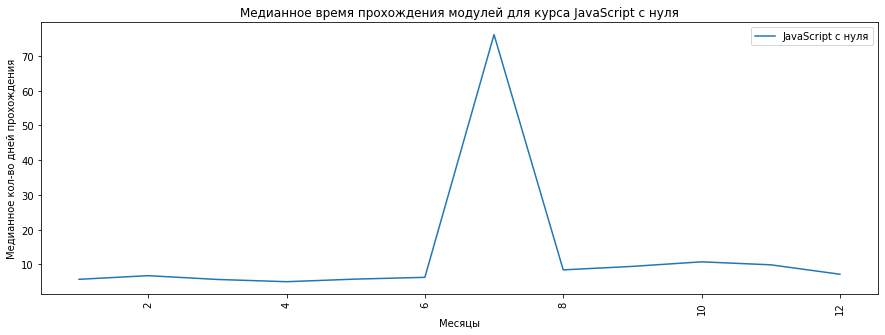

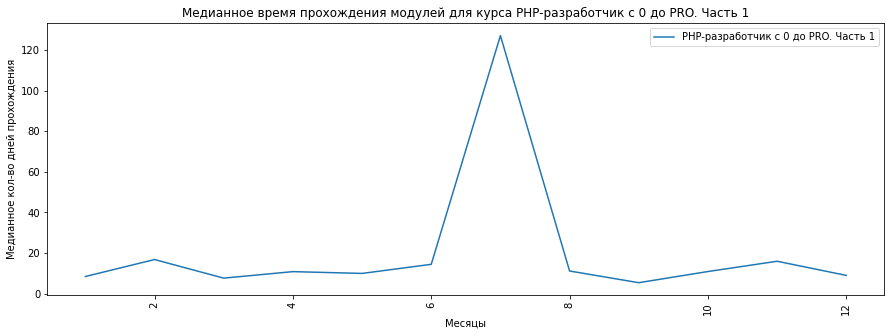

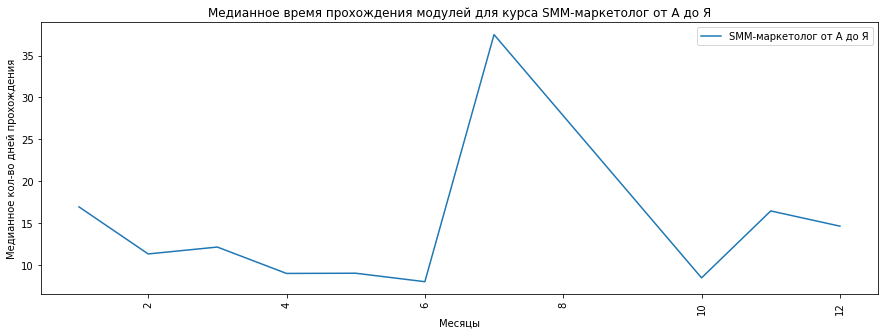

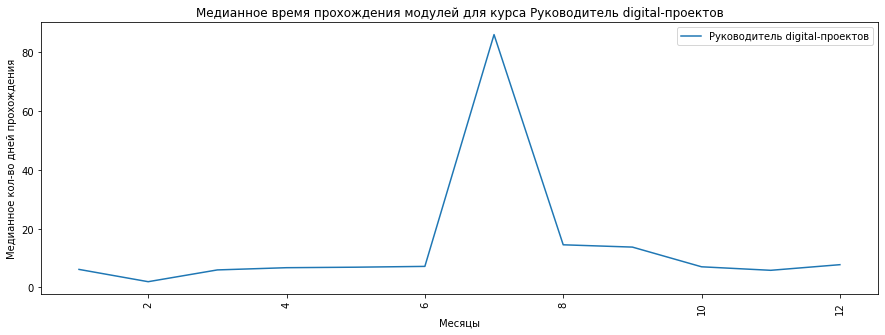

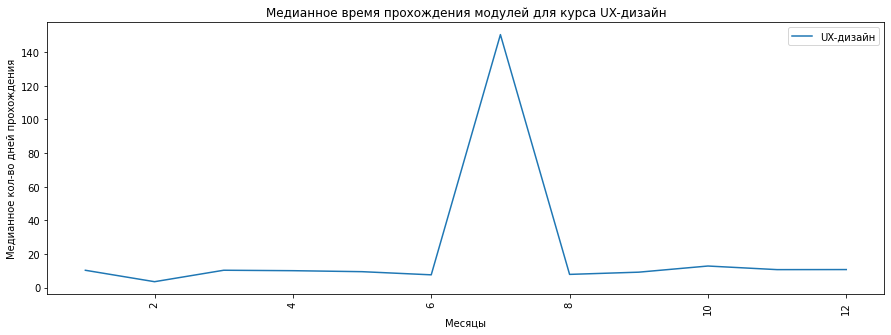

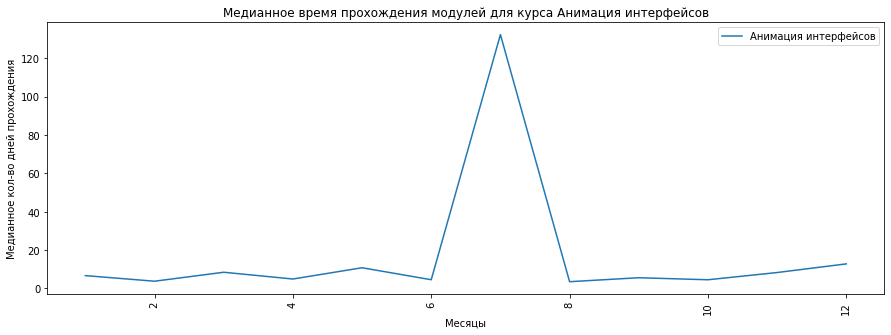

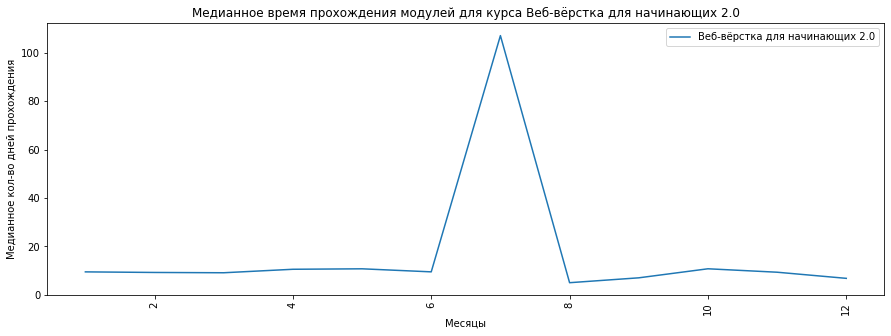

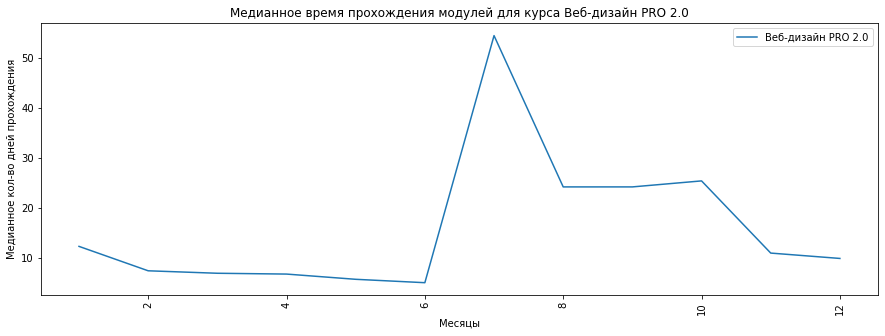

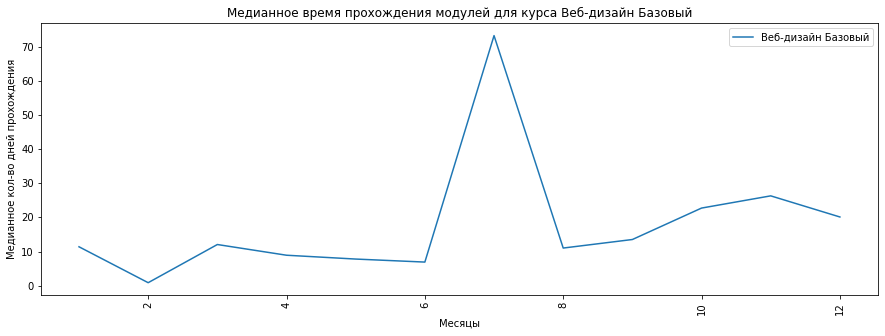

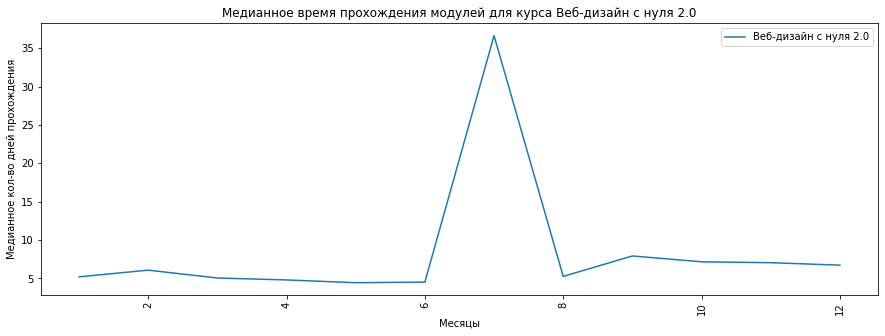

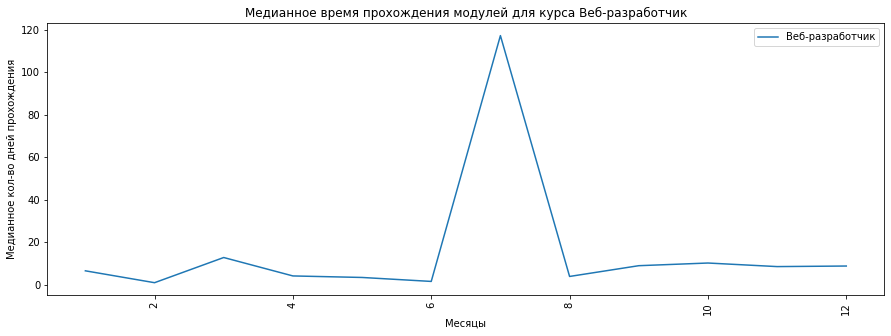

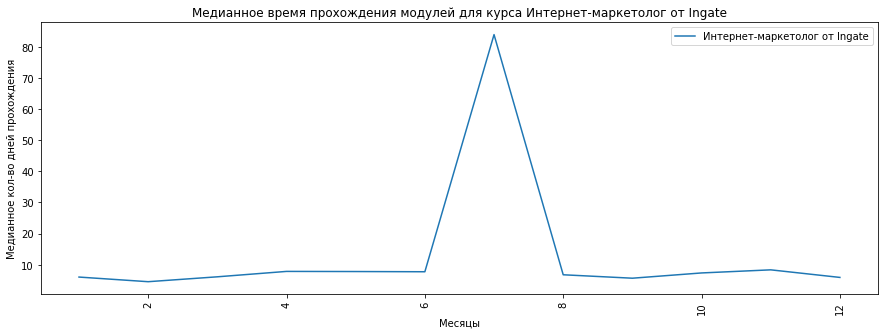

In [428]:
#визуализация
for i in courses:
    
    fig, ax = plt.subplots(figsize = (15,5))
    
    ax.plot(df_season.loc[df_season.course_title == i, :].finish_months, \
            df_season.loc[df_season.course_title == i, :].delta_days,\
            label = i)

    ax.set_title('Медианное время прохождения модулей для курса'+ ' ' + i)
    ax.set_xlabel('Месяцы')
    ax.set_ylabel('Медианное кол-во дней прохождения')
    ax.tick_params(axis = 'x', rotation = 90)
    ax.legend()

    plt.show()

И на отдельных графиках, и на общем графике можно выделить определенную закономерность, что время прохождения модулей резко возрастает в летние месяцы: с июля по август. Это можно объяснить тем, что большинство людей планируют на эти месяцы отпуска, в связи с чем откладывают учебу на потом.

Из небольших отклонений можно отметить, что в курсах  SMM-маркетолог и Веб-дизайн PRO время не приходит в норму вплоть до октября, а в курсе Веб-дизайн Базовый есть небольшое возрастание времени прохождения с октября по декабрь.

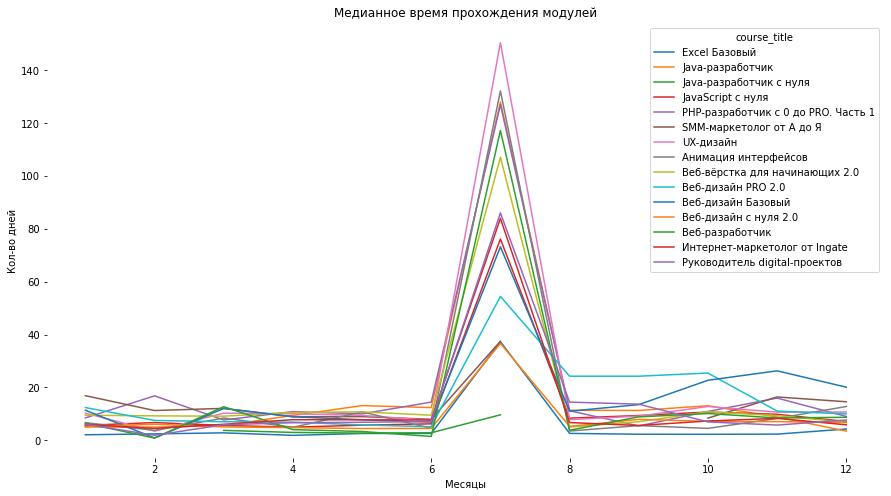

In [727]:
#визуализация с медианным временем выполнения домашней работы по месяцам
fig, ax = plt.subplots(figsize=(15, 8))
pd.pivot_table(df_season, index = ['finish_months'], columns = ['course_title'], values = 'delta_days')\
              .plot(ax = ax)

ax.set(title='Медианное время прохождения модулей', \
       ylabel='Кол-во дней', \
       xlabel = 'Месяцы')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

In [45]:
#считаем, сколько студентов закончило каждый модуль

#проверить для каждого студента, все ли домашние задания в модуле в статусе done
df_done = df[(df['status']=='done')&(df['is_homework']==True)]

df_done = df_done.groupby(['course_field', 'course_title', 'module_number', 'module_title']).student_id.count().reset_index()

df_done.rename(columns={'student_id':'done'}, inplace = True)

#считаем, сколько студентов начало следующий модуль

df_start = df[df['is_homework']==True]

df_start = df_start.groupby(['course_field','course_title', 'module_number', 'module_title']).student_id.count().reset_index()

df_start.rename(columns = {'student_id':'start'}, inplace = True)

#объединяем два датасета в один, чтобы посчитать конверсию
df_conversion = df_done.merge(df_start, on = ['course_field', 'course_title', 'module_number', 'module_title'])

#сдвиг столбцов на 1 вниз для расчета
df_conversion['done'] = df_conversion.done.shift(1)

f = lambda x: x[1]/x[0]
df_conversion['conv'] = df_conversion.loc[:, ['done', 'start']].apply(f, axis = 1)

#df_conversion.fillna(1, inplace = True)

#конверсии на первый модуль присваиваем 1, так как первый модуль все по умолчанию начинают
df_conversion['conv'][df_conversion['module_number'] == 1] = 1

df_conversion.head()

course_field   course_title  module_number  \
0     Business  Excel Базовый              1   
1     Business  Excel Базовый              2   
2     Business  Excel Базовый              3   
3     Business  Excel Базовый              4   
4     Business  Excel Базовый              5   

                                        module_title   done  start      conv  
0                          Основной функционал Excel    NaN    518  1.000000  
1            Основной функционал Excel (продолжение)  458.0    434  0.947598  
2                  Формулы и функции Excel. Введение  406.0    398  0.980296  
3  Формулы и функции Excel. Продолжаем работать с...  387.0    345  0.891473  
4     Формулы и функции Excel. Более сложные формулы  303.0    298  0.983498

In [46]:
#для удобства построения графиков объединим название и модуль модуля
df_conversion['module_number'] = df_conversion['module_number'].astype(str) +\
                                    ' '+ df_conversion['module_title'] 
df_conversion.head()

course_field   course_title  \
0     Business  Excel Базовый   
1     Business  Excel Базовый   
2     Business  Excel Базовый   
3     Business  Excel Базовый   
4     Business  Excel Базовый   

                                       module_number  \
0                        1 Основной функционал Excel   
1          2 Основной функционал Excel (продолжение)   
2                3 Формулы и функции Excel. Введение   
3  4 Формулы и функции Excel. Продолжаем работать...   
4   5 Формулы и функции Excel. Более сложные формулы   

                                        module_title   done  start      conv  
0                          Основной функционал Excel    NaN    518  1.000000  
1            Основной функционал Excel (продолжение)  458.0    434  0.947598  
2                  Формулы и функции Excel. Введение  406.0    398  0.980296  
3  Формулы и функции Excel. Продолжаем работать с...  387.0    345  0.891473  
4     Формулы и функции Excel. Более сложные формулы  303.0    298  0.983498

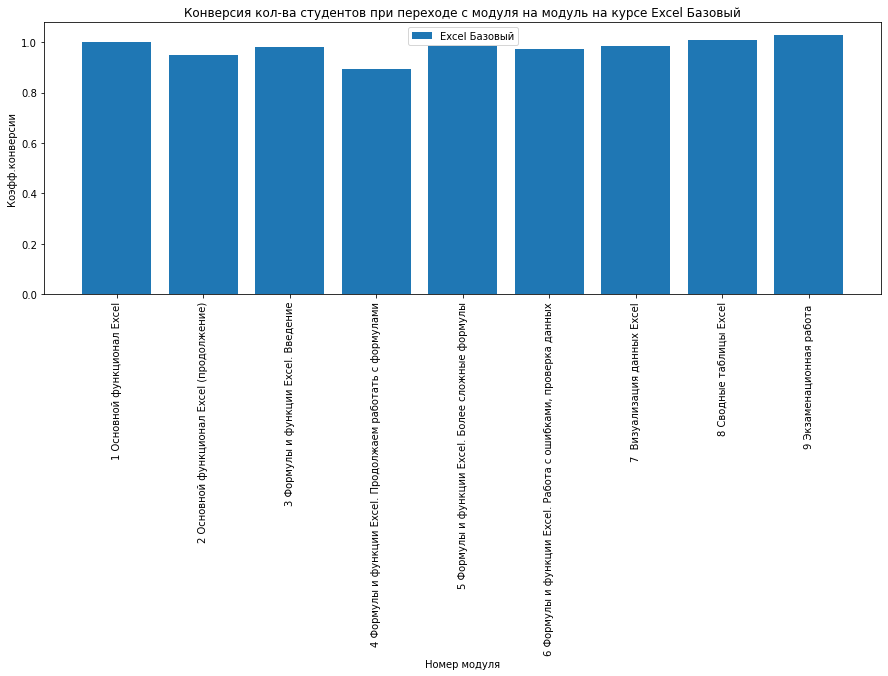

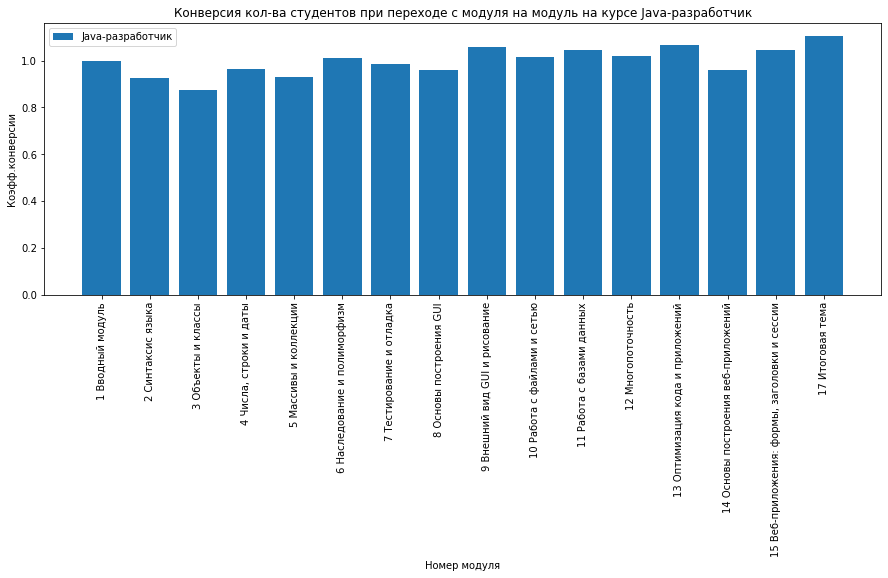

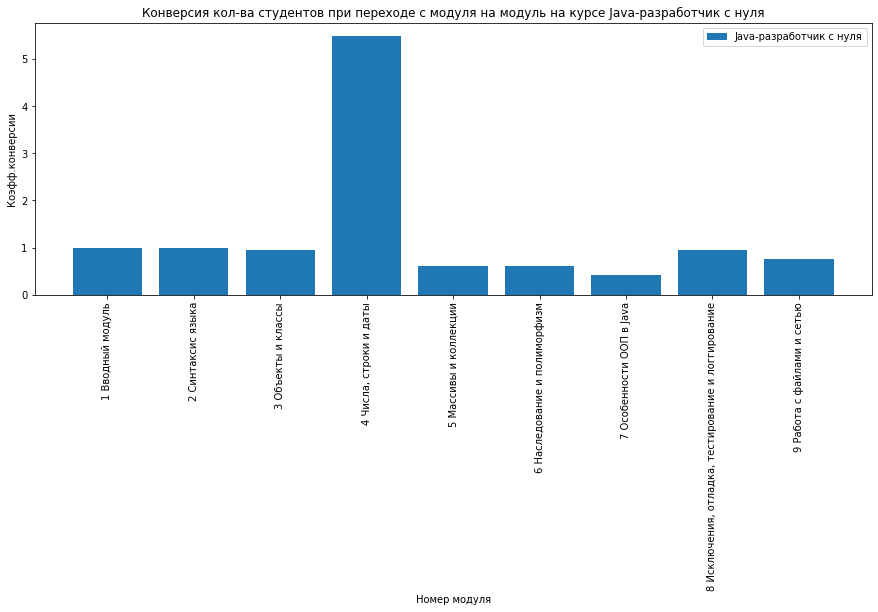

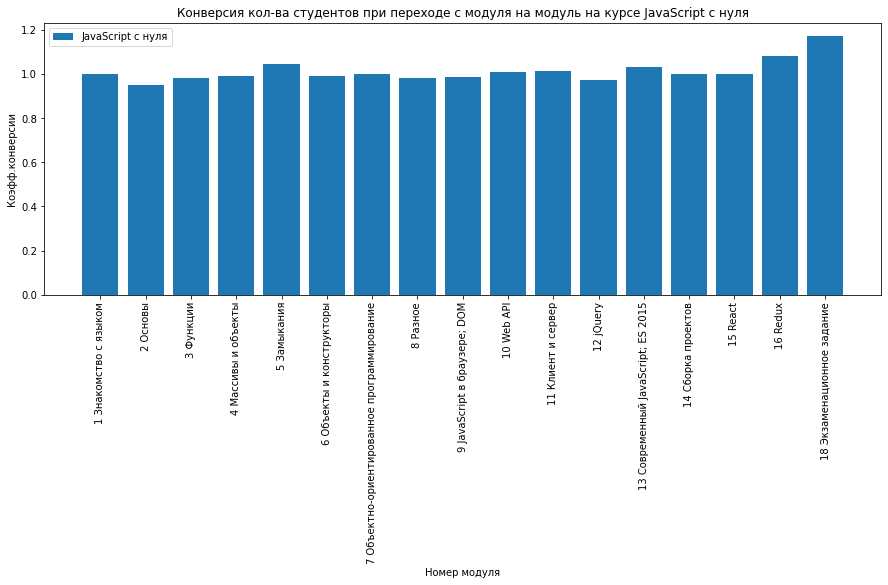

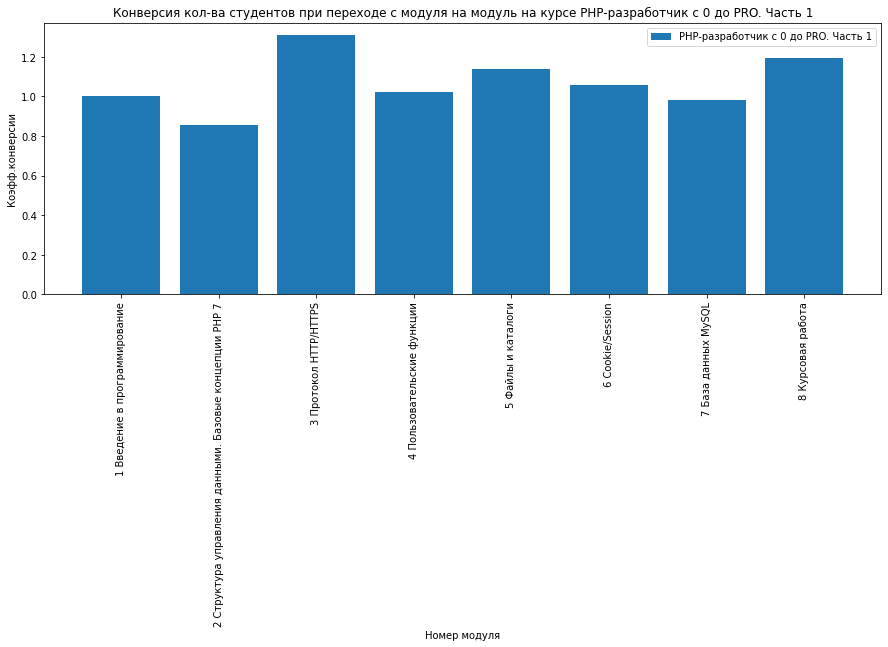

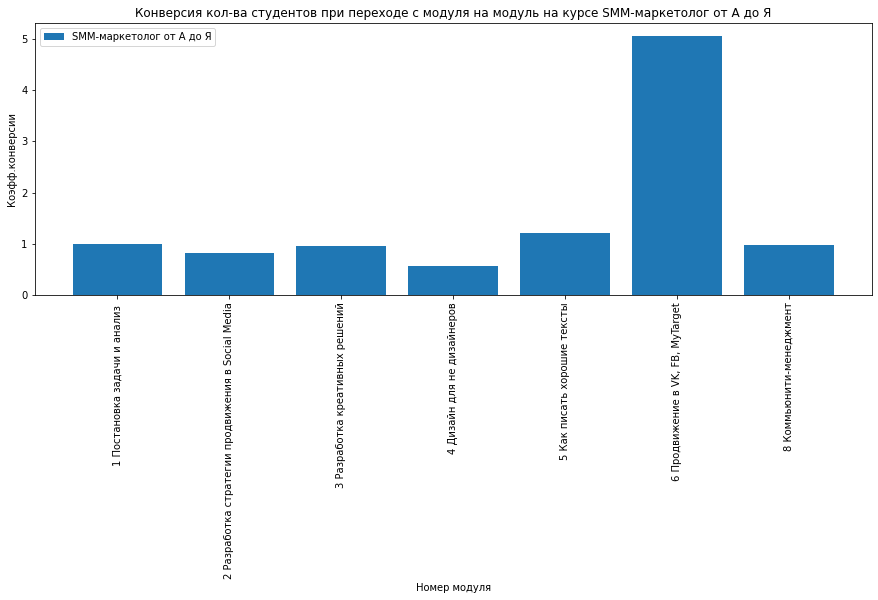

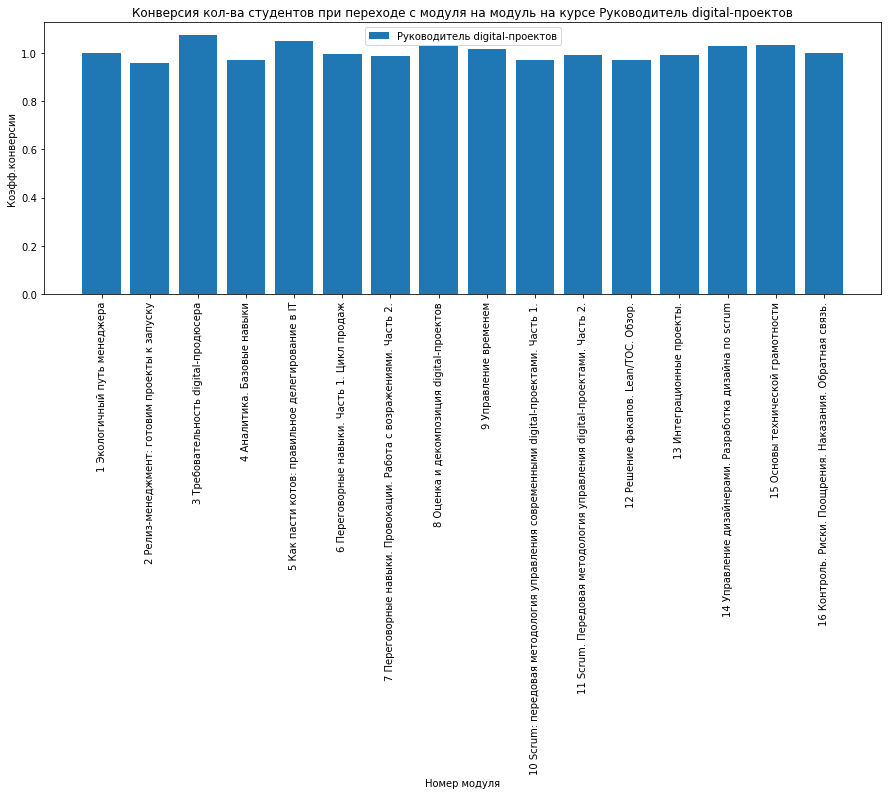

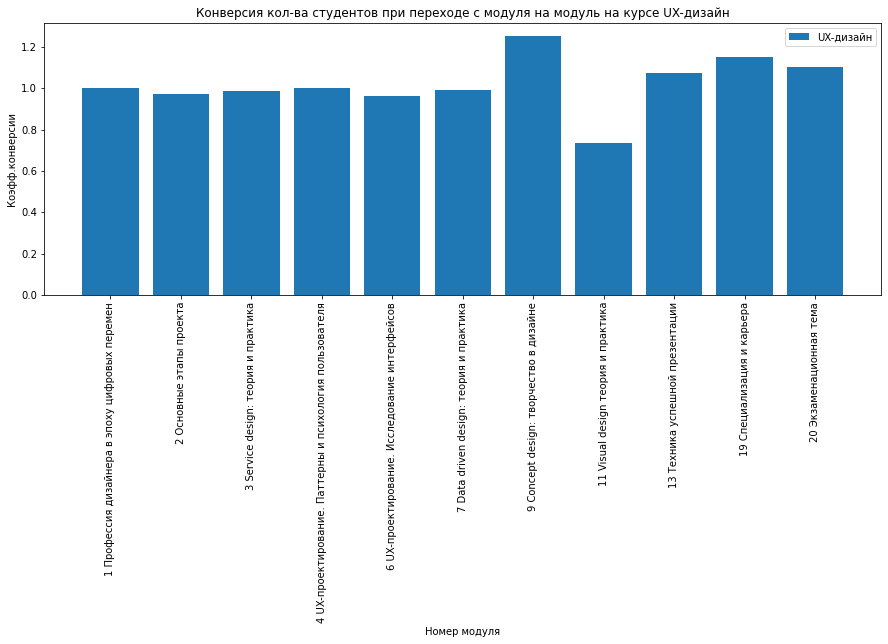

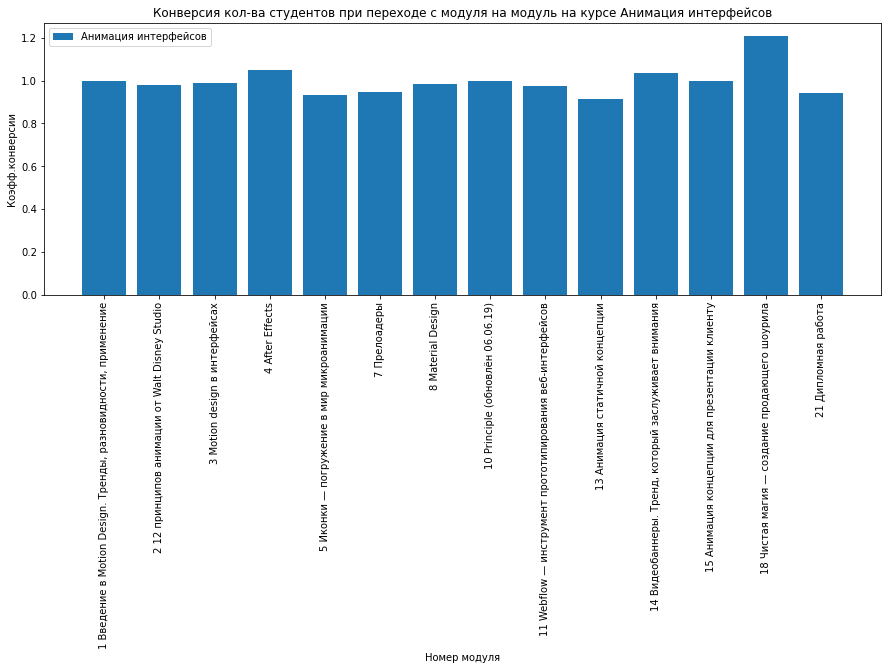

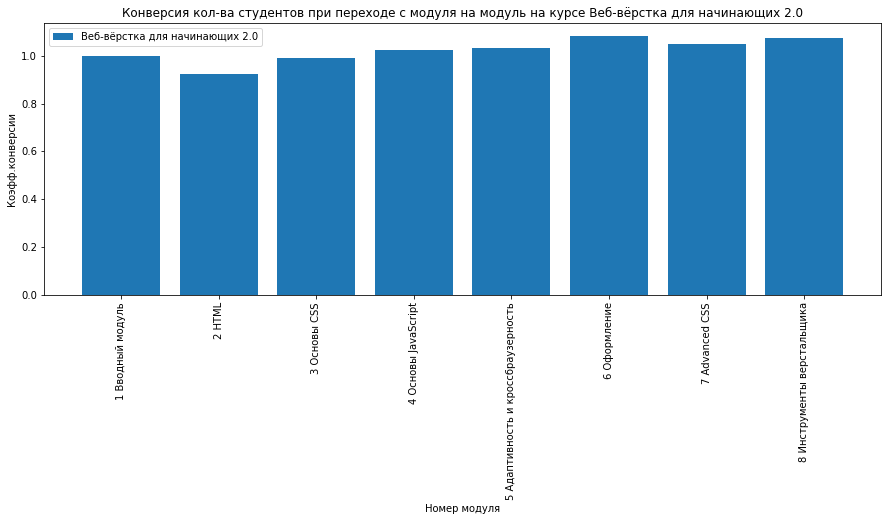

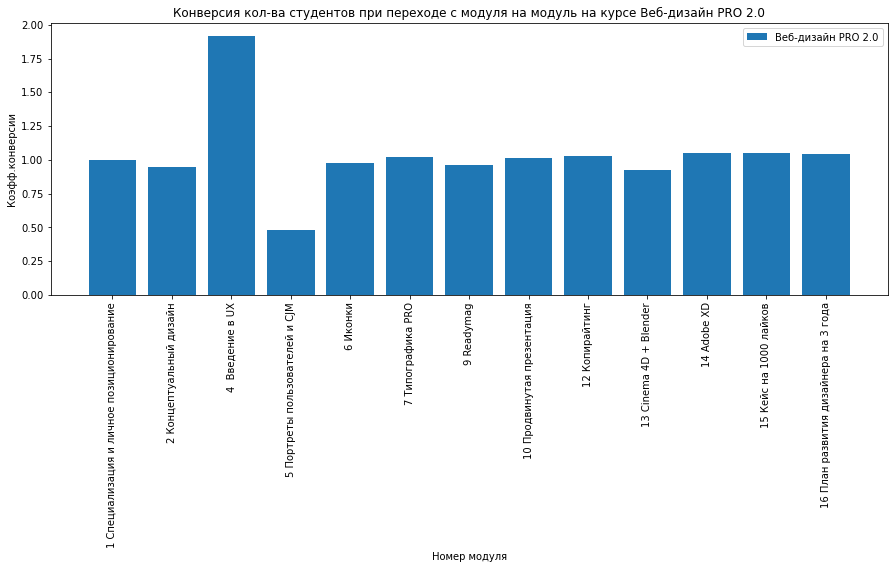

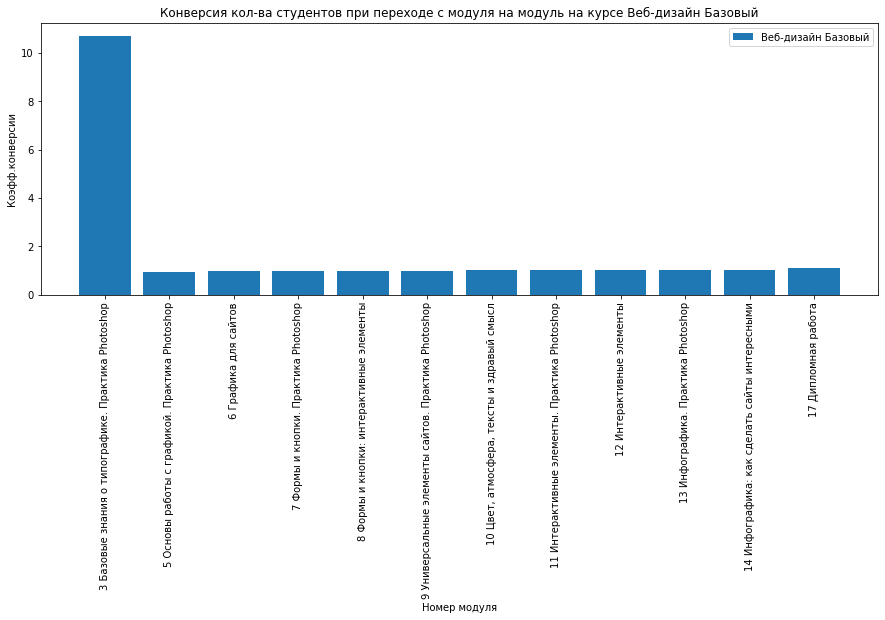

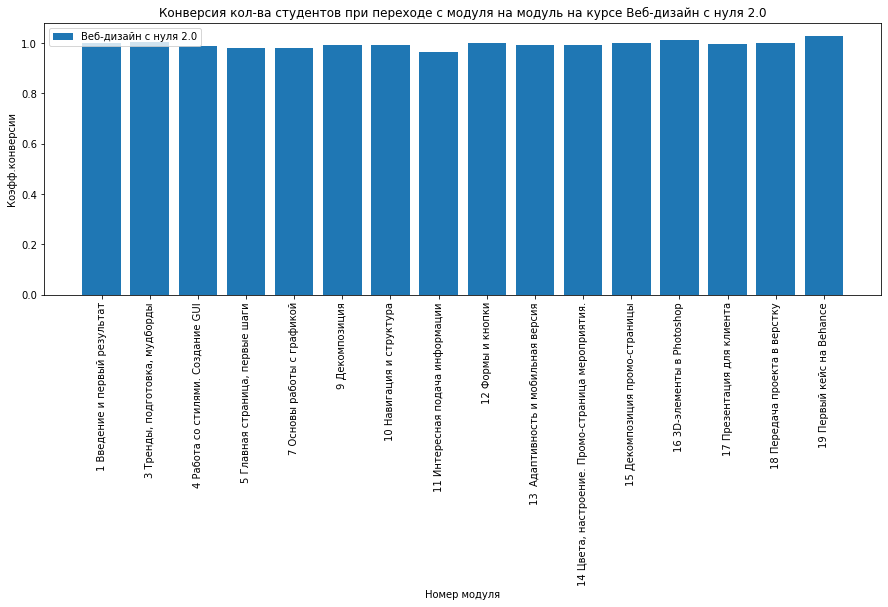

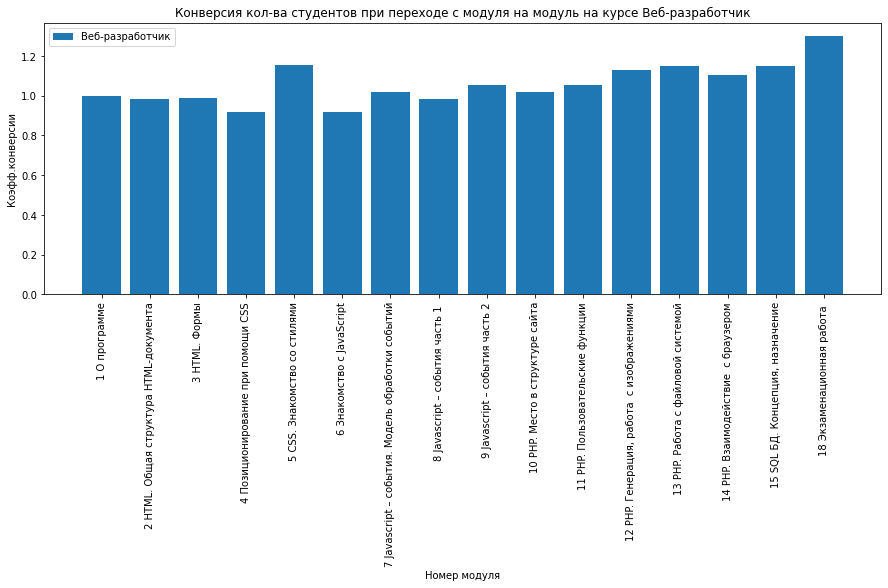

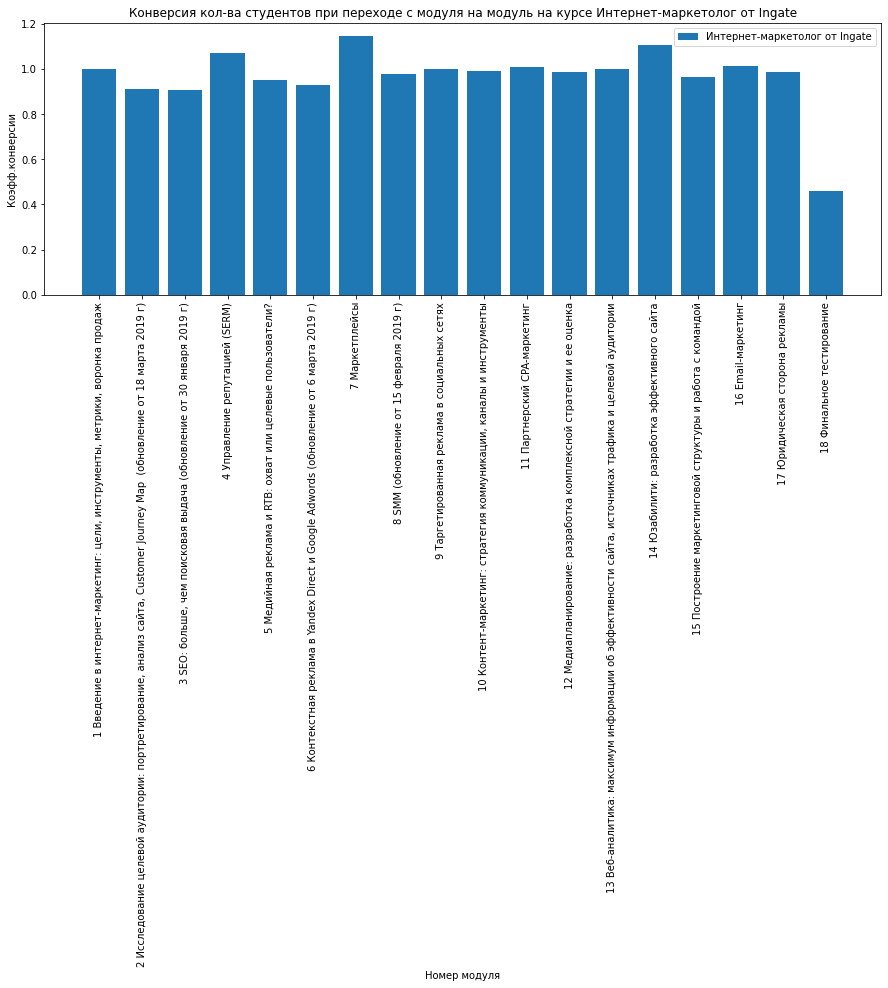

In [664]:
#визуализация
for i in courses:

    fig, ax = plt.subplots(figsize = (15, 5))
    
    ax.bar(df_conversion.loc[df_conversion.course_title == i, :].module_number, \
            df_conversion.loc[df_conversion.course_title == i, :].conv,\
            label = i)

    ax.set_title('Конверсия кол-ва студентов при переходе с модуля на модуль на курсе'+ ' ' + i)
    ax.set_xlabel('Номер модуля')
    ax.set_ylabel('Коэфф.конверсии')
    ax.tick_params(axis = 'x', rotation = 90)
    ax.legend()

    plt.show()

В большинстве курсов конверсия находится примерно на одинаковом уровне, это говорит о равномерном прохождении курсов студентами.

При этом выделяется курс Java-разработчик c нуля, где конверсия на 4ый модуль составляет больше 5. Конверсия имеющая значение больше 1.0 означает, что за выполнение этого модуля принялось большее количество студентов чем количество завершивших предыдущий модуль. Похожая картина наблюдается в модуле 6 курса SMM-маркетолог от А до Я.

Веб-дизайн PRO - наблюдается большая конверсия на 4ый модуль, почти 200%, но при этом конверсия всего в 50% на 5ый модуль.

Веб-дизайн Базовый - конверсия на третий модуль больше 10 (видимо до третьего модуля просто не было домашних заданий), а затем выравнивается до 1, как в остальных курсах.

Интернет-маркетолог от Ingate - наблюдается всего 40% конверсии на финальное тестирование.

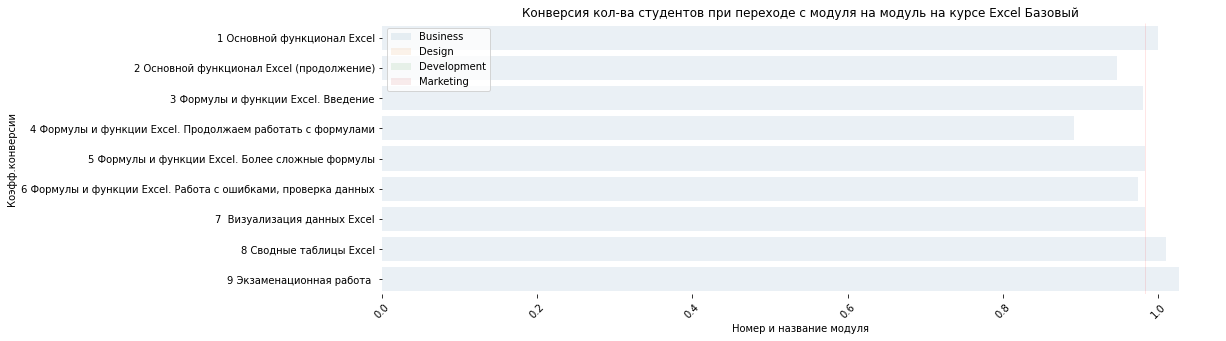

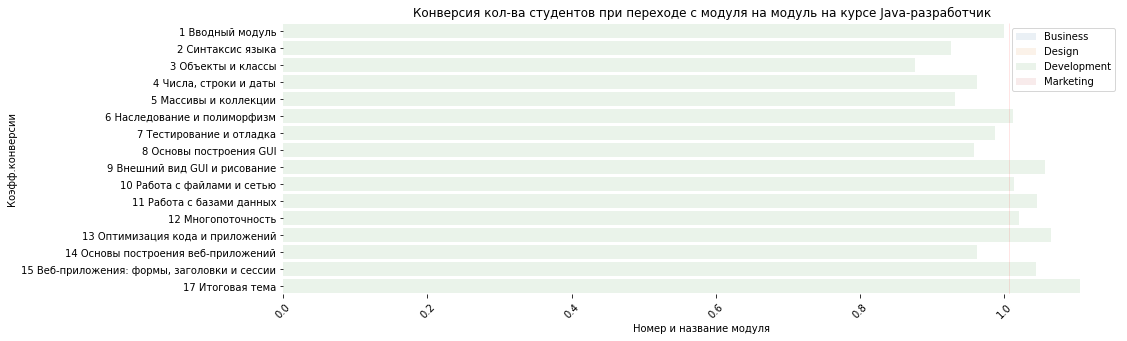

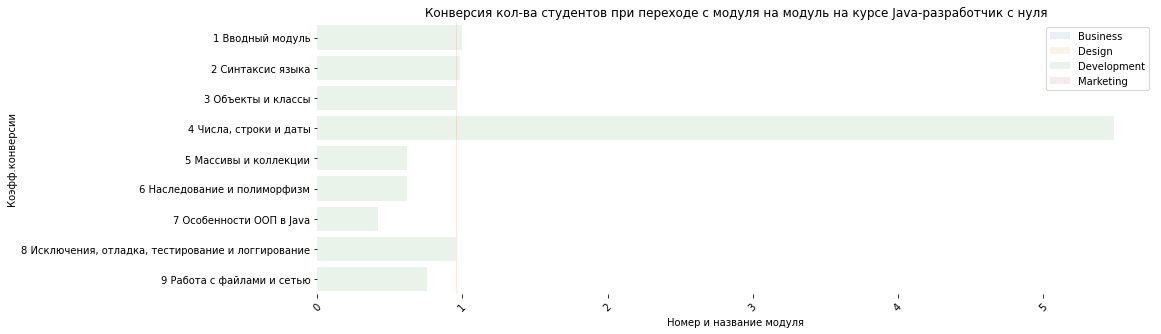

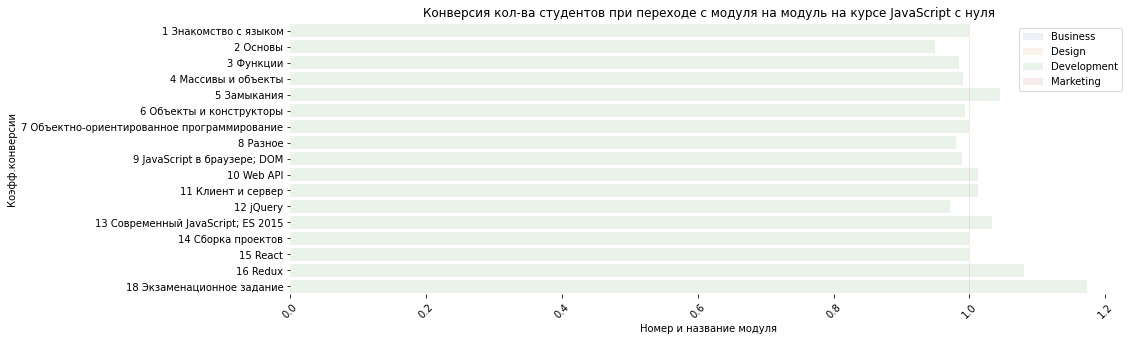

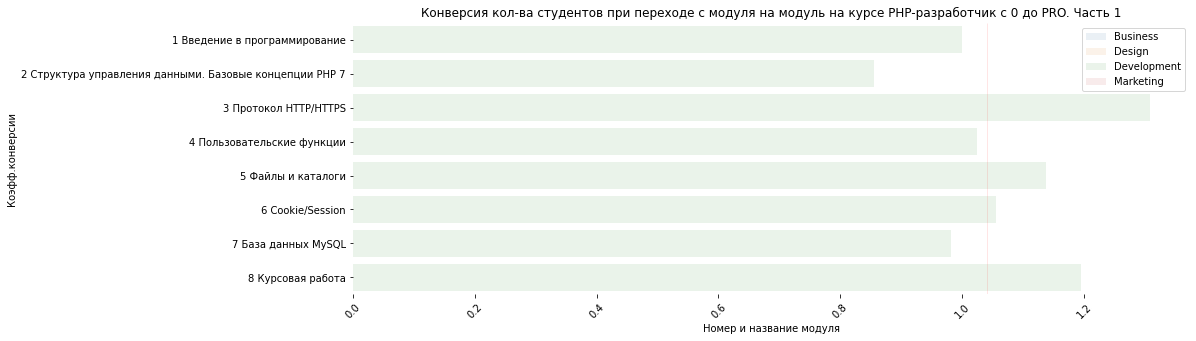

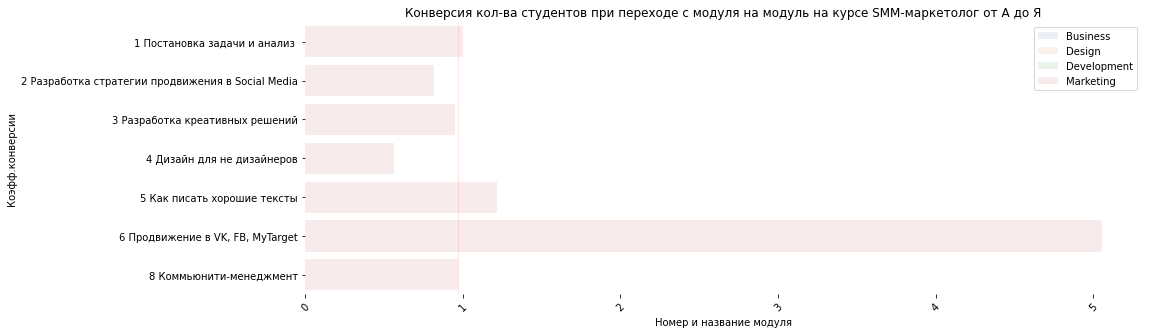

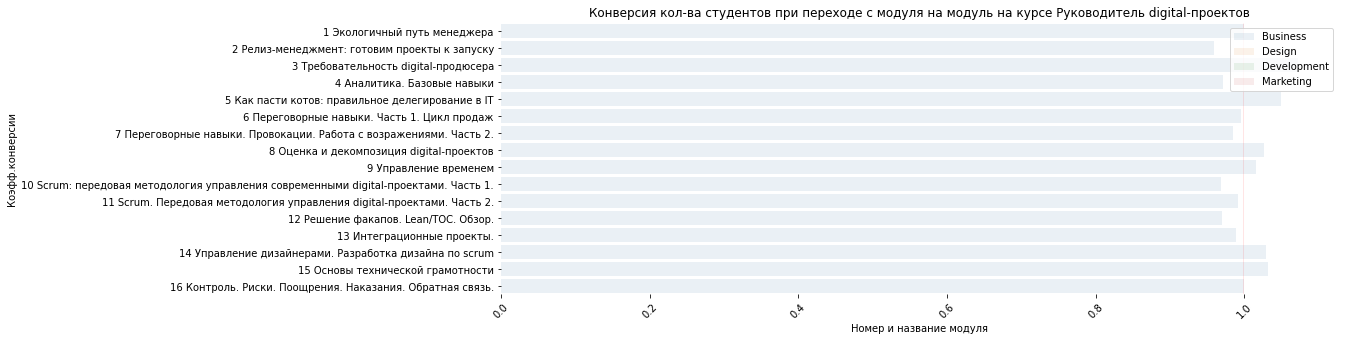

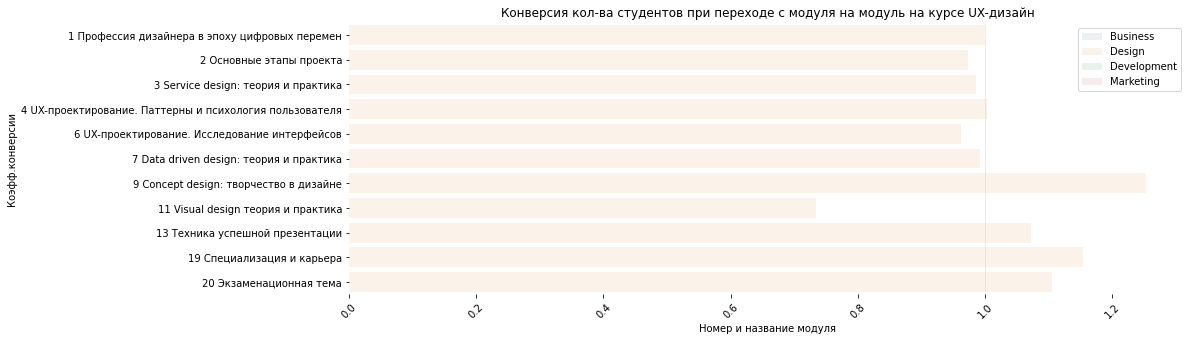

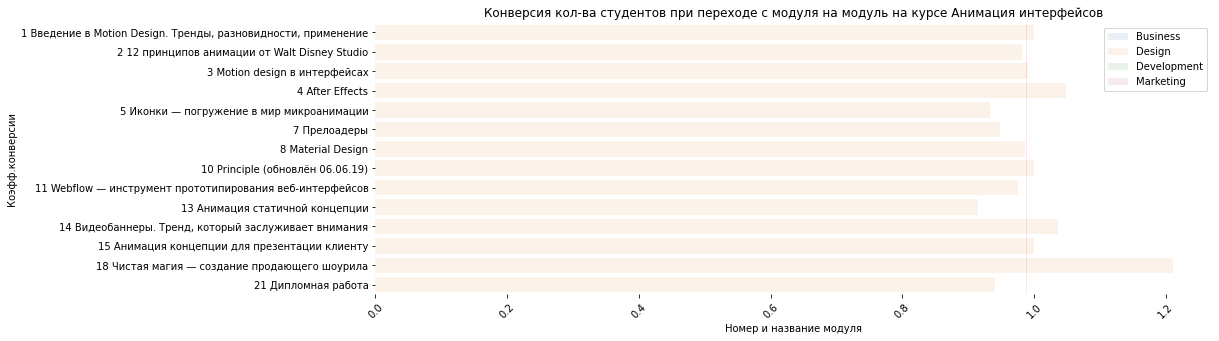

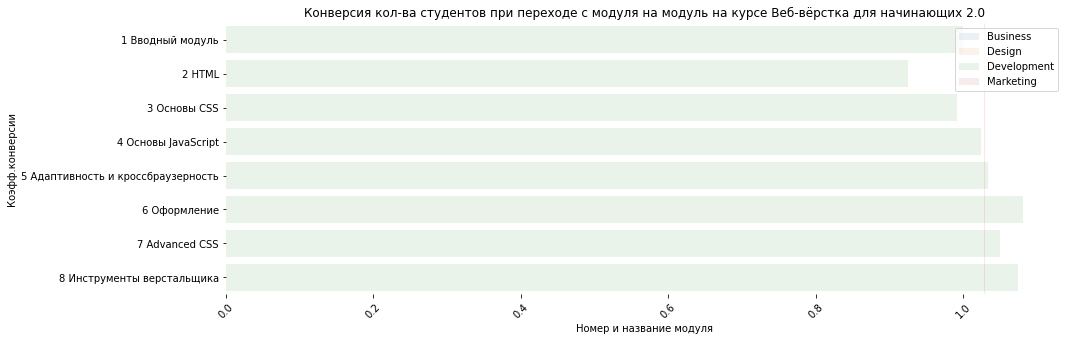

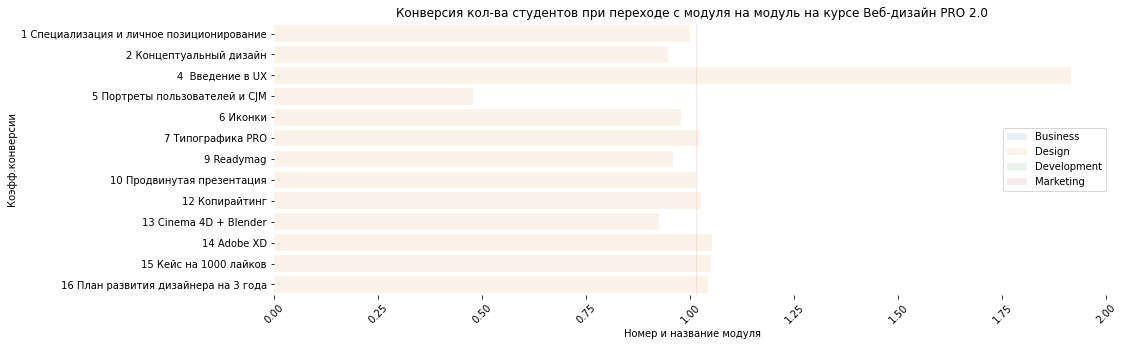

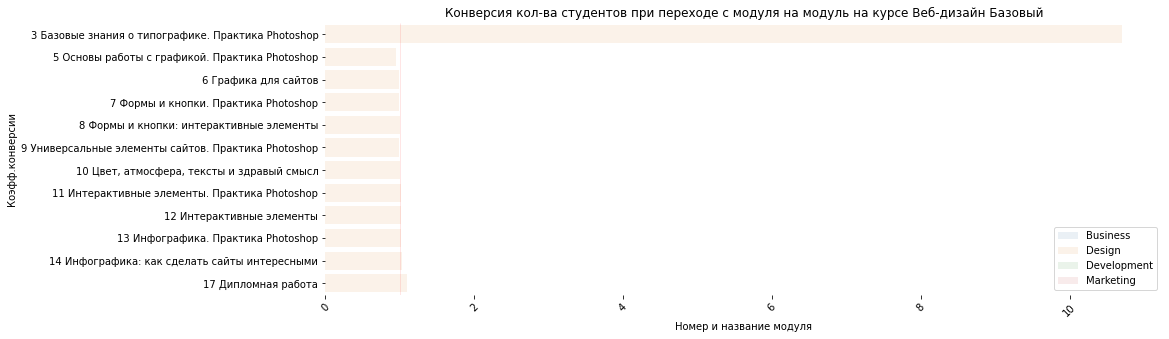

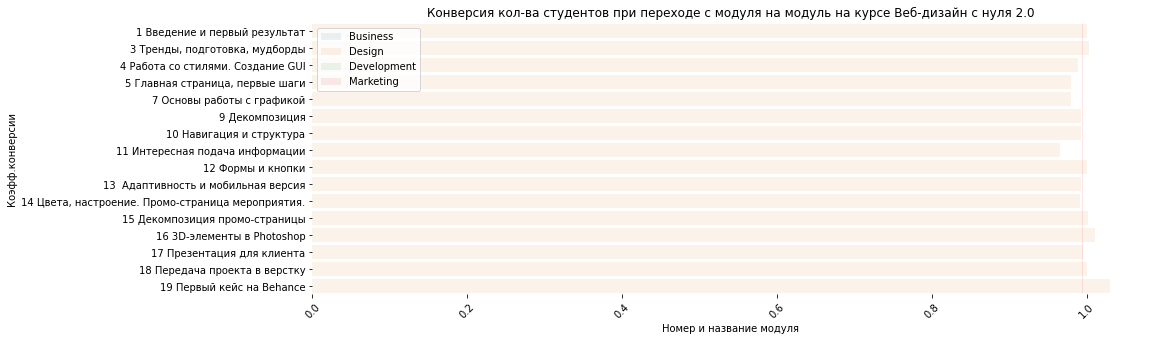

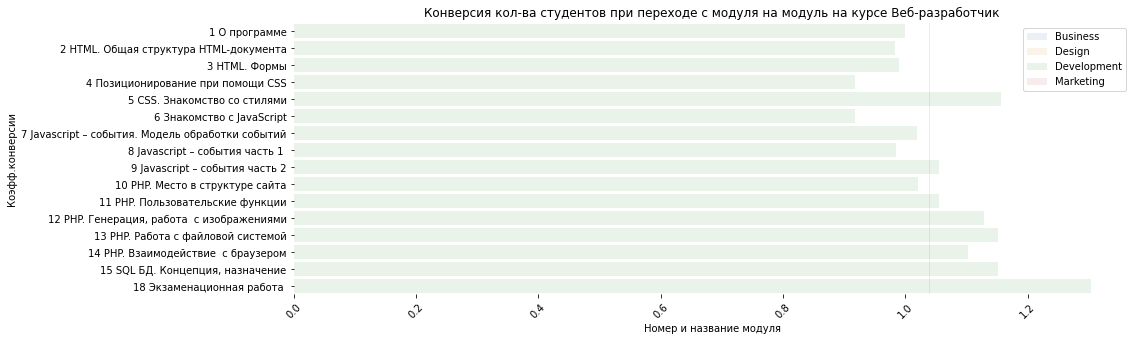

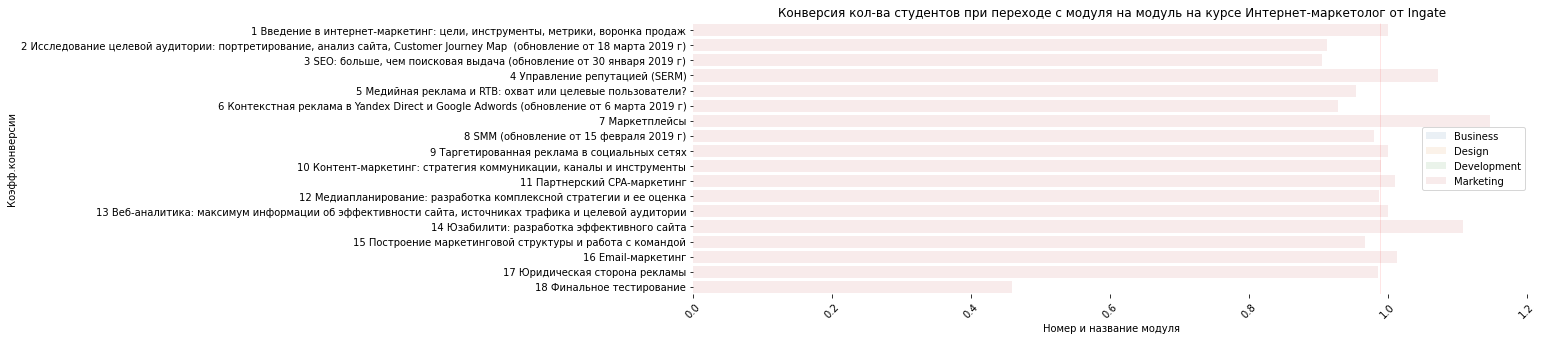

In [665]:
#визуалиазация конверсии перехода студентов из одного модуля в другой на каждом курсе
for i in courses:
    
    fig, ax = plt.subplots(figsize=(15, 5))
    #ax.barh(df_conversion.loc[df_conversion.course_title == i, :].module_number, \
    #        df_conversion.loc[df_conversion.course_title == i, :].conv, label = i, alpha = 0.1, \
    #        color = 'blue')
    
    sns.barplot(data = df_conversion, y = df_conversion.loc[df_conversion.course_title == i, :].module_number, \
                             x = df_conversion.loc[df_conversion.course_title == i, :].conv,\
                             hue = 'course_field', ax = ax, alpha = 0.1, orient = 'h', dodge=False)
    
    ax.axvspan(xmin = df_conversion.loc[df_conversion.course_title == i, :].conv.median(), \
               xmax = df_conversion.loc[df_conversion.course_title == i, :].conv.median(),\
               color = 'red', alpha = 0.1)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_title('Конверсия кол-ва студентов при переходе с модуля на модуль на курсе'+ ' ' + i)
    ax.set_xlabel('Номер и название модуля')
    ax.set_ylabel('Коэфф.конверсии')
    ax.tick_params(axis = 'x', rotation = 45)
    ax.legend()

    plt.show()

## 5. Метрика успеваемости 

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. 

Исходя из имеющихся данных, метрикой успеваемости студента может служить время прохождения модуля.
Нужно отследить студентов, которые дольше всех проходят модули. 
Можно предположить, что студент, который дольше проходит модуль - либо обладает недостаточной мотивацеий к учебе, либо тратит больше времени на получение тех знаний, которые уже есть у других студентов на курсе.

In [47]:
df_metrics = df.copy()

df_metrics['finish_date'] = df_metrics['finish_date'].fillna('2019-07-31')

#дата начала прохождения каждого модуля для каждого студента
df_metrics_1 = df_metrics.groupby(['course_title', 'module_number', 'module_title', 'student_id']).start_date.min().reset_index()

#дата окончания прохождения каждого модуля для каждого студента
df_metrics_2 = df_metrics.groupby(['course_title', 'module_number','module_title', 'student_id']).finish_date.max().reset_index()

#объединяем два датасета, чтобы посчитать разницу между временем начала и временем окончания модуля
df_metrics = df_metrics_1.merge(df_metrics_2, how = 'right', on = ['course_title','module_number', 'module_title','student_id'])

df_metrics['start_date'] = pd.to_datetime(df_metrics['start_date'])
df_metrics['finish_date'] = pd.to_datetime(df_metrics['finish_date'], utc=True)

#убираем некорректные данные, где дата начала позже даты окончания, чтобы не получать отрицательные результаты
df_metrics = df_metrics.drop(df_metrics[df_metrics.finish_date <= df_metrics.start_date].index) 

#вычисляем разность
df_metrics['delta'] = (df_metrics['finish_date'] - df_metrics['start_date'])

f = lambda x: x.total_seconds()/86400
df_metrics['delta_days'] = df_metrics['delta'].apply(f)
df_metrics

df_metrics.head()

course_title  module_number               module_title  \
0  Excel Базовый              1  Основной функционал Excel   
1  Excel Базовый              1  Основной функционал Excel   
2  Excel Базовый              1  Основной функционал Excel   
3  Excel Базовый              1  Основной функционал Excel   
4  Excel Базовый              1  Основной функционал Excel   

                         student_id                       start_date  \
0  001b192f899a84496be98b41906246fc 2019-01-01 09:39:23.905333+00:00   
1  006f0189ec657741ee4d53474c7a258d 2019-01-18 09:52:22.255231+00:00   
2  0074621b6955733338ab0feb2a9a2100 2019-04-08 10:17:00.167348+00:00   
3  0098ca12f73a56dadbf6099389305d80 2019-03-12 14:15:49.118784+00:00   
4  00b374d9c1cc22543c4d9d3939a6fd8d 2019-01-16 10:54:12.599810+00:00   

                       finish_date                    delta  delta_days  
0 2019-03-31 07:19:02.064532+00:00  88 days 21:39:38.159199   88.902525  
1 2019-01-26 09:52:36.422160+00:00   8 days 00:00:14.166929    8.000164  
2 2019-04-13 05:57:59.476184+00:00   4 days 19:40:59.308836    4.820131  
3 2019-04-05 09:37:10.695661+00:00  23 days 19:21:21.576877   23.806500  
4        2019-07-31 00:00:00+00:00 195 days 13:05:47.400190  195.545688

In [48]:
#теперь нужно вывести список студентов в каждом курсе, у которых это время является максимальным
#например для Excel Базовый
df_metrics[df_metrics['course_title']=='Excel Базовый'].sort_values('delta_days', ascending = False).head(10)

course_title  module_number  \
1971  Excel Базовый              4   
105   Excel Базовый              1   
462   Excel Базовый              1   
107   Excel Базовый              1   
3314  Excel Базовый              9   
3326  Excel Базовый              9   
565   Excel Базовый              1   
321   Excel Базовый              1   
3012  Excel Базовый              8   
718   Excel Базовый              1   

                                           module_title  \
1971  Формулы и функции Excel. Продолжаем работать с...   
105                           Основной функционал Excel   
462                           Основной функционал Excel   
107                           Основной функционал Excel   
3314                            Экзаменационная работа    
3326                            Экзаменационная работа    
565                           Основной функционал Excel   
321                           Основной функционал Excel   
3012                              Сводные таблицы Excel   
718                           Основной функционал Excel   

                            student_id                       start_date  \
1971  c7d9f03162dab0e04e28067dafddb050        2018-02-05 13:33:21+00:00   
105   20804c32da13576833a5124961cd08f1 2018-02-20 07:32:00.659219+00:00   
462   a002a005048ae8cc2ff6cdc120cf3aad 2018-02-20 07:32:00.662563+00:00   
107   20c53f24862768765e7e43325987e07a 2018-02-20 07:32:00.671098+00:00   
3314  eda4e489680ba93c58b4e3f4f170d7a5 2018-02-21 15:31:04.678891+00:00   
3326  f73ff6df8e4fcbc4b3c4ff2398d67621 2018-02-26 11:12:42.849721+00:00   
565   bed2fcfbd96c21dba83f209872457695 2018-03-16 09:20:37.472443+00:00   
321   6e7cef31213c48ac5829d303828211d5 2018-03-29 09:49:30.089287+00:00   
3012  76aaaabc337e12dc06ffa43bdefe1036 2018-04-24 11:22:55.620186+00:00   
718   ee926ea9092943e6eb0c88095b021d6d 2018-05-24 12:41:25.923905+00:00   

                   finish_date                    delta  delta_days  
1971 2019-07-31 00:00:00+00:00        540 days 10:26:39  540.435174  
105  2019-07-31 00:00:00+00:00 525 days 16:27:59.340781  525.686103  
462  2019-07-31 00:00:00+00:00 525 days 16:27:59.337437  525.686103  
107  2019-07-31 00:00:00+00:00 525 days 16:27:59.328902  525.686103  
3314 2019-07-31 00:00:00+00:00 524 days 08:28:55.321109  524.353418  
3326 2019-07-31 00:00:00+00:00 519 days 12:47:17.150279  519.532837  
565  2019-07-31 00:00:00+00:00 501 days 14:39:22.527557  501.610677  
321  2019-07-31 00:00:00+00:00 488 days 14:10:29.910713  488.590624  
3012 2019-07-31 00:00:00+00:00 462 days 12:37:04.379814  462.525745  
718  2019-07-31 00:00:00+00:00 432 days 11:18:34.076095  432.471228

Видно, что есть студенты, которые начали прохождение модуля еще в 2018 году и до сих пор не завершили его.
У кого-то возникли сложности с экзаменационной работой, кто-то даже не продвинулся с первого модуля.
Важно добавить, что анализ был проведен с учетом того, что дата завершения заполнялась с допущением, что модуль был выполнен в последний день наблюдений - 31/07/2019, если представить, что модуль был выполнен в месяц начала выполнения, что список проблемных студентов будет немного видоизменен.
Однако даже если считать, что задание было выполнено в том же месяце, то к следующему заданию студент так 
и не приступил, то есть его в полной мере можно считать проблемным.

In [746]:
#посмотрим показатели статистики для delta days
df_metrics[df_metrics['course_title']=='Excel Базовый']['delta_days'].describe()

count    3.333000e+03
mean     5.038908e+01
std      8.890195e+01
min      6.984954e-08
25%      3.423689e+00
50%      9.136989e+00
75%      4.352664e+01
max      5.404352e+02
Name: delta_days, dtype: float64

<AxesSubplot:>

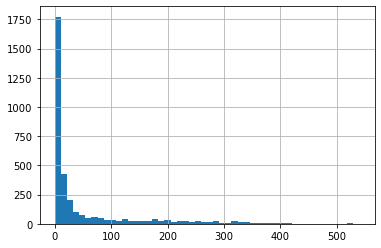

In [745]:
df_metrics[df_metrics['course_title']=='Excel Базовый']['delta_days'].hist(bins = 50)

<AxesSubplot:>

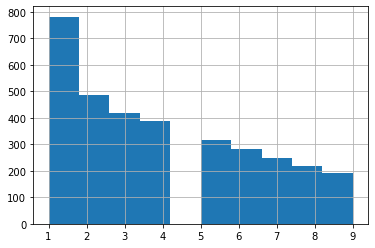

In [758]:
df_metrics[df_metrics['course_title']=='Excel Базовый']['module_number'].hist(bins = 10)

На гистограмме видно, что бОльшая часть студентов (1750 из 3333) все-таки проходит курс и медианное время прохождения модуля примерно до 10 дней. Дальше тянется длинный хвост из студентов, которые затрудняются с происхождением модулей.
Если взять студентов, у которых время выполнения задания больше медианного, то получим список из почти что 800 студентов, но если взять студентов, к которых среднее время выполнения более 400 дней, то получится список из 27 студентов. Можно будет сначала сконцентрироваться на них, а уже потом перейти к остальным.

Можно также посмотреть, на каком именно модуле у студента возники проблемы. На гистограмме видно, что больше всего студентов "зависло" на первом модуле.

In [49]:
#таким образом получаем следующий список студентов для курса Excel Базовый
df_metrics[(df_metrics['course_title']=='Excel Базовый')\
           &(df_metrics['delta_days']>400)].sort_values('delta_days', ascending = False).head(10)

course_title  module_number  \
1971  Excel Базовый              4   
105   Excel Базовый              1   
462   Excel Базовый              1   
107   Excel Базовый              1   
3314  Excel Базовый              9   
3326  Excel Базовый              9   
565   Excel Базовый              1   
321   Excel Базовый              1   
3012  Excel Базовый              8   
718   Excel Базовый              1   

                                           module_title  \
1971  Формулы и функции Excel. Продолжаем работать с...   
105                           Основной функционал Excel   
462                           Основной функционал Excel   
107                           Основной функционал Excel   
3314                            Экзаменационная работа    
3326                            Экзаменационная работа    
565                           Основной функционал Excel   
321                           Основной функционал Excel   
3012                              Сводные таблицы Excel   
718                           Основной функционал Excel   

                            student_id                       start_date  \
1971  c7d9f03162dab0e04e28067dafddb050        2018-02-05 13:33:21+00:00   
105   20804c32da13576833a5124961cd08f1 2018-02-20 07:32:00.659219+00:00   
462   a002a005048ae8cc2ff6cdc120cf3aad 2018-02-20 07:32:00.662563+00:00   
107   20c53f24862768765e7e43325987e07a 2018-02-20 07:32:00.671098+00:00   
3314  eda4e489680ba93c58b4e3f4f170d7a5 2018-02-21 15:31:04.678891+00:00   
3326  f73ff6df8e4fcbc4b3c4ff2398d67621 2018-02-26 11:12:42.849721+00:00   
565   bed2fcfbd96c21dba83f209872457695 2018-03-16 09:20:37.472443+00:00   
321   6e7cef31213c48ac5829d303828211d5 2018-03-29 09:49:30.089287+00:00   
3012  76aaaabc337e12dc06ffa43bdefe1036 2018-04-24 11:22:55.620186+00:00   
718   ee926ea9092943e6eb0c88095b021d6d 2018-05-24 12:41:25.923905+00:00   

                   finish_date                    delta  delta_days  
1971 2019-07-31 00:00:00+00:00        540 days 10:26:39  540.435174  
105  2019-07-31 00:00:00+00:00 525 days 16:27:59.340781  525.686103  
462  2019-07-31 00:00:00+00:00 525 days 16:27:59.337437  525.686103  
107  2019-07-31 00:00:00+00:00 525 days 16:27:59.328902  525.686103  
3314 2019-07-31 00:00:00+00:00 524 days 08:28:55.321109  524.353418  
3326 2019-07-31 00:00:00+00:00 519 days 12:47:17.150279  519.532837  
565  2019-07-31 00:00:00+00:00 501 days 14:39:22.527557  501.610677  
321  2019-07-31 00:00:00+00:00 488 days 14:10:29.910713  488.590624  
3012 2019-07-31 00:00:00+00:00 462 days 12:37:04.379814  462.525745  
718  2019-07-31 00:00:00+00:00 432 days 11:18:34.076095  432.471228